# EDA

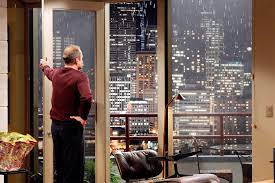

In [709]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [710]:
house_sales = pd.read_csv('data/house_sales.csv')
house_details = pd.read_csv('data/house_details.csv')


In [711]:
# import missingno
import missingno as msno

In [712]:
house_sales.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [713]:

house_details.columns

#house_details['yr_renovated'].fillna(house_details['yr_built'], inplace=True)
house_details.info()
house_details['yr_renovated'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

count   17609.000
mean      838.806
std      4005.127
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     20150.000
Name: yr_renovated, dtype: float64

### General Summary for all set



In [714]:
#step 1 join tables
house_details.rename(columns={'id': 'house_id'}, inplace=True)
house_details.columns
house_details_unique = house_details.drop_duplicates(subset=['house_id'])
house_sales_unique = house_sales.drop_duplicates(subset=['house_id'])


df_house_info = pd.merge(house_details_unique,house_sales_unique,how='inner',on='house_id')
#df_house_info.info()
df_house_info['date']=pd.to_datetime(df_house_info['date'])
df_house_info['year']=df_house_info['date'].dt.year
#df_house_info['zipcode'].unique() 


# 邮编与对应区域的映射关系
zipcode_to_area = {
    '98002': 'Auburn',
    '98155': 'Shoreline',
    '98188': 'Tukwila',
    '98059': 'Renton',
    '98118': 'Seattle',
    '98003': 'Federal Way',
    '98023': 'Federal Way',
    '98117': 'Seattle',
    '98034': 'Kirkland',
    '98022': 'Enumclaw',
    '98116': 'Seattle',
    '98001': 'Auburn',
    '98010': 'Black Diamond',
    '98198': 'Des Moines',
    '98042': 'Kent',
    '98038': 'Maple Valley',
    '98027': 'Issaquah',
    '98045': 'North Bend',
    '98144': 'Seattle',
    '98029': 'Issaquah',
    '98075': 'Sammamish',
    '98199': 'Seattle',
    '98107': 'Seattle',
    '98105': 'Seattle',
    '98052': 'Redmond',
    '98053': 'Redmond',
    '98014': 'Carnation',
    '98077': 'Woodinville',
    '98115': 'Seattle',
    '98011': 'Bothell',
    '98008': 'Bellevue',
    '98019': 'Duvall',
    '98092': 'Auburn',
    '98074': 'Sammamish',
    '98030': 'Kent',
    '98103': 'Seattle',
    '98004': 'Bellevue',
    '98126': 'Seattle',
    '98177': 'Seattle',
    '98056': 'Renton',
    '98133': 'Seattle',
    '98112': 'Seattle',
    '98033': 'Kirkland',
    '98028': 'Kenmore',
    '98007': 'Bellevue',
    '98005': 'Bellevue',
    '98136': 'Seattle',
    '98031': 'Kent',
    '98032': 'Kent',
    '98168': 'Seattle',
    '98006': 'Bellevue',
    '98178': 'Seattle',
    '98072': 'Woodinville',
    '98102': 'Seattle',
    '98125': 'Seattle',
    '98146': 'Seattle',
    '98166': 'Seattle',
    '98122': 'Seattle',
    '98070': 'Vashon',
    '98148': 'Seattle',
    '98040': 'Mercer Island',
    '98106': 'Seattle',
    '98065': 'Snoqualmie',
    '98108': 'Seattle',
    '98058': 'Renton',
    '98024': 'Fall City',
    '98055': 'Renton',
    '98109': 'Seattle',
    '98119': 'Seattle',
    '98039': 'Medina'
}

# 将邮编映射到对应区域，并创建新列
df_house_info['zipcode'] = df_house_info['zipcode'].astype(str)
df_house_info['area'] = df_house_info['zipcode'].map(zipcode_to_area)



In [715]:
df_house_info['condition'].unique()


array([3, 5, 4, 2, 1])

In [716]:
df_house_info['grade'].unique()

array([ 7,  6,  8, 10,  5,  9, 11, 13, 12,  4,  3])

In [717]:
df_house_info['year'].unique()

array([2014, 2015], dtype=int32)

In [718]:
df_house_info.columns

df_house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21420 non-null  int64         
 1   bedrooms       21420 non-null  float64       
 2   bathrooms      21420 non-null  float64       
 3   sqft_living    21420 non-null  float64       
 4   sqft_lot       21420 non-null  float64       
 5   floors         21420 non-null  float64       
 6   waterfront     19060 non-null  float64       
 7   view           21357 non-null  float64       
 8   condition      21420 non-null  int64         
 9   grade          21420 non-null  int64         
 10  sqft_above     21420 non-null  float64       
 11  sqft_basement  20969 non-null  float64       
 12  yr_built       21420 non-null  int64         
 13  yr_renovated   17609 non-null  float64       
 14  zipcode        21420 non-null  object        
 15  lat            2142

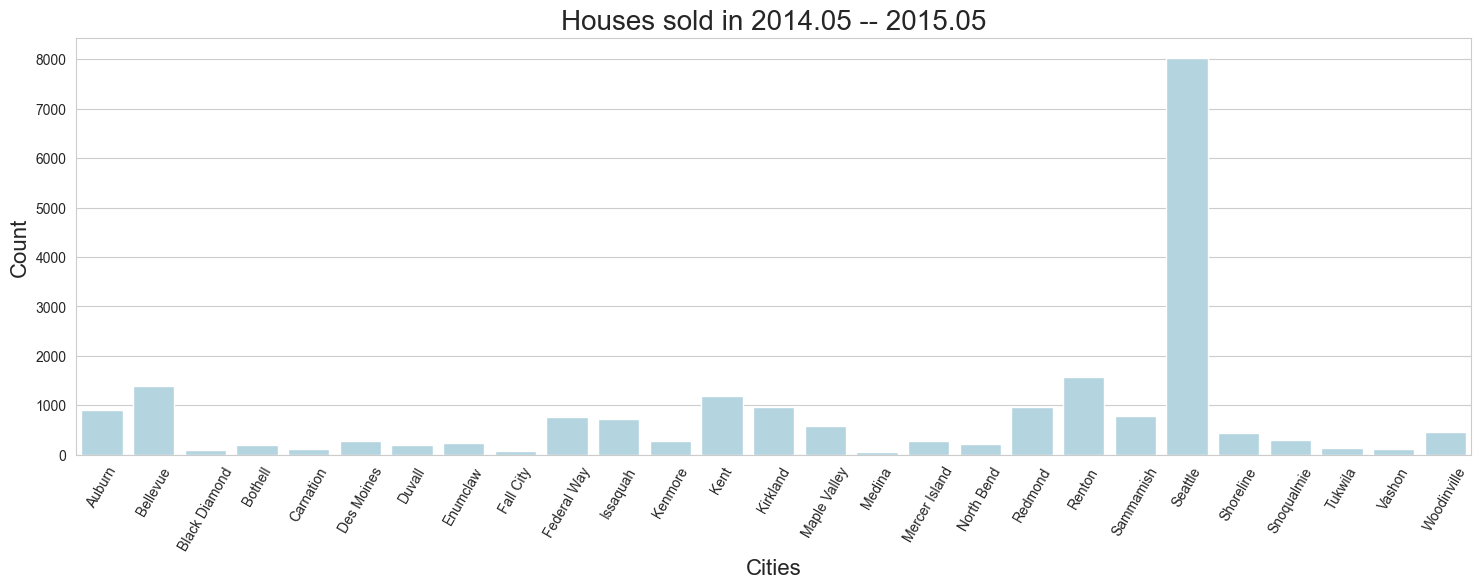

In [719]:
df_house_info_count = df_house_info.groupby('area')['house_id'].count().reset_index()
df_house_info_count.columns
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
ax = sns.barplot(x='area',y='house_id',data=df_house_info_count, color='lightblue')

plt.title('Houses sold in 2014.05 -- 2015.05', fontsize=20)
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=60)

plt.subplots_adjust(top=1.5)
plt.show()

In [720]:


# 对指定列进行描述性统计
df_statistics = df_house_info[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built']].describe()


df_statistics['yr_built']=df_statistics['yr_built'].astype(int)

df_statistics

price  bedrooms  bathrooms  sqft_living    sqft_lot  condition  \
count   21420.000 21420.000  21420.000    21420.000   21420.000  21420.000   
mean   540739.304     3.374      2.118     2083.133   15128.038      3.411   
std    367931.110     0.925      0.769      918.808   41530.797      0.650   
min     78000.000     1.000      0.500      370.000     520.000      1.000   
25%    322500.000     3.000      1.750     1430.000    5040.000      3.000   
50%    450000.000     3.000      2.250     1920.000    7614.000      3.000   
75%    645000.000     4.000      2.500     2550.000   10690.500      4.000   
max   7700000.000    33.000      8.000    13540.000 1651359.000      5.000   

          grade  yr_built  
count 21420.000     21420  
mean      7.663      1971  
std       1.172        29  
min       3.000      1900  
25%       7.000      1952  
50%       7.000      1975  
75%       8.000      1997  
max      13.000      2015

In [721]:
#step 2 Calculate average price
df_avg_price = pd.DataFrame()
df_avg_price['house_id'] = df_house_info['house_id']
df_avg_price['zipcode'] = df_house_info['zipcode']

df_avg_price['price/sqft_living'] = df_house_info['price'] / df_house_info['sqft_living']

df_avg_price['price/sqft_lot'] = df_house_info['price'] / df_house_info['sqft_lot']
df_avg_price['lat'] = df_house_info['lat']
df_avg_price['long'] = df_house_info['long']
df_avg_price['area'] = df_house_info['area']
df_avg_price['price'] = df_house_info['price']
df_avg_price.drop_duplicates(subset=['house_id'])
df_count_by_city = df_avg_price.groupby('area')['house_id'].count().reset_index()
df_avg_price.rename(columns={'house_id':'count'},inplace=True)



In [722]:
df_avg_price['area'].unique().size

27

<Figure size 1800x300 with 0 Axes>

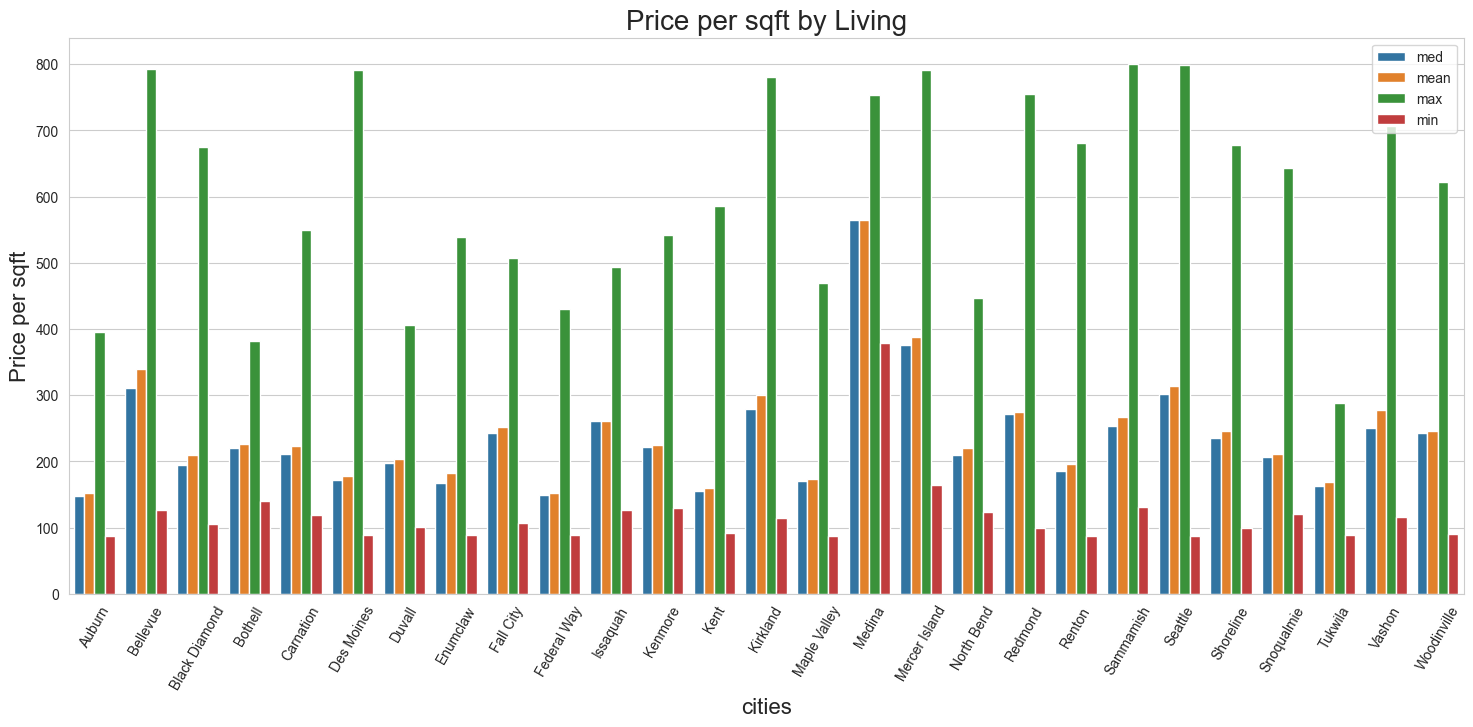

In [723]:
#Statistic of Price per sqft by living 
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
df_avg_price_median = df_avg_price.groupby('area')[['price/sqft_living']].median().reset_index()
df_avg_price_median['type'] = "med"
df_avg_price_mean = df_avg_price.groupby('area')[['price/sqft_living']].mean().reset_index()
df_avg_price_mean['type'] = "mean"
df_avg_price_max = df_avg_price.groupby('area')[['price/sqft_living']].max().reset_index()
df_avg_price_max['type'] = "max"
df_avg_price_min = df_avg_price.groupby('area')[['price/sqft_living']].min().reset_index()
df_avg_price_min['type'] = "min"
df_merged = pd.concat([df_avg_price_median, df_avg_price_mean, df_avg_price_max, df_avg_price_min])
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
ax = sns.barplot(x='area', y='price/sqft_living', data=df_merged, hue='type')

plt.title('Price per sqft by Living', fontsize=20)
plt.xlabel('cities', fontsize=16)
plt.ylabel('Price per sqft', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()


In [724]:
df_avg_price.head()

count zipcode  price/sqft_living  price/sqft_lot    lat     long  \
0     1000102   98002            116.667          29.873 47.326 -122.214   
1   100100050   98155            208.333          24.797 47.775 -122.304   
2  1001200035   98188            201.815          34.172 47.432 -122.292   
3  1001200050   98188            205.556          35.734 47.433 -122.292   
4  1003000175   98188            225.510          29.056 47.436 -122.290   

        area      price  
0     Auburn 280000.000  
1  Shoreline 275000.000  
2    Tukwila 272450.000  
3    Tukwila 259000.000  
4    Tukwila 221000.000

In [725]:
df = df_avg_price

In [726]:
df.head()

count zipcode  price/sqft_living  price/sqft_lot    lat     long  \
0     1000102   98002            116.667          29.873 47.326 -122.214   
1   100100050   98155            208.333          24.797 47.775 -122.304   
2  1001200035   98188            201.815          34.172 47.432 -122.292   
3  1001200050   98188            205.556          35.734 47.433 -122.292   
4  1003000175   98188            225.510          29.056 47.436 -122.290   

        area      price  
0     Auburn 280000.000  
1  Shoreline 275000.000  
2    Tukwila 272450.000  
3    Tukwila 259000.000  
4    Tukwila 221000.000

In [727]:
#Geographical location map
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the dataset
# If not, replace df with your DataFrame name

# Convert latitude and longitude to radians
df['lat_rad'] = np.radians(df['lat'])
df['long_rad'] = np.radians(df['long'])

# Define grid size
grid_size = 0.0001  # Adjust according to your preference

# Assign each point to a grid cell
df['lat_bin'] = (df['lat_rad'] / grid_size).astype(int)
df['long_bin'] = (df['long_rad'] / grid_size).astype(int)

# Calculate centroids of grid cells
centroids = df.groupby(['lat_bin', 'long_bin']).agg({'lat_rad': 'mean', 'long_rad': 'mean', 'price/sqft_living': 'mean'}).reset_index()

# Convert centroids back to degrees
centroids['lat'] = np.degrees(centroids['lat_rad'])
centroids['long'] = np.degrees(centroids['long_rad'])

# Create the plot
fig = px.scatter_mapbox(centroids, lat='lat', lon='long', color='price/sqft_living', size='price/sqft_living',
                        color_continuous_scale='Viridis', size_max=10,
                        mapbox_style='carto-positron', zoom=9)

# Update layout
fig.update_layout(title='Geolocation Plot by Average Price per Living (Clustered)',
                  mapbox=dict(center=dict(lat=47.6, lon=-122.3)),
                  margin=dict(r=0, l=0, t=0, b=0))

# Show the plot
fig.show()





In [728]:
df_house_info.groupby('area')['zipcode'].nunique().sort_values()


area
Fall City         1
Medina            1
Maple Valley      1
Vashon            1
Kenmore           1
Shoreline         1
Snoqualmie        1
Mercer Island     1
North Bend        1
Duvall            1
Des Moines        1
Carnation         1
Bothell           1
Black Diamond     1
Tukwila           1
Enumclaw          1
Sammamish         2
Kirkland          2
Woodinville       2
Issaquah          2
Federal Way       2
Redmond           2
Auburn            3
Renton            4
Kent              4
Bellevue          5
Seattle          26
Name: zipcode, dtype: int64

### General Summary for Seattle
1,in the city centre house price is more expensive 
2,the ratio of living space to floor space is higher.


In [729]:
df_house_info.head()
df_house_Seattle  = df_house_info[df_house_info['area'] == "Seattle"]
df_house_Seattle 
df_house_Seattle['price/sqft'] = df_house_Seattle['price']/df_house_Seattle['sqft_living']
df_house_Seattle['sqft_living15/sqft_lot15']=df_house_Seattle['sqft_living15']/df_house_Seattle['sqft_lot15'].round(3)
df_house_Seattle['sqft_living/sqft_lot']=df_house_Seattle['sqft_living']/df_house_Seattle['sqft_lot'].round(3)
df_house_info.columns


Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'id', 'year', 'area'],
      dtype='object')

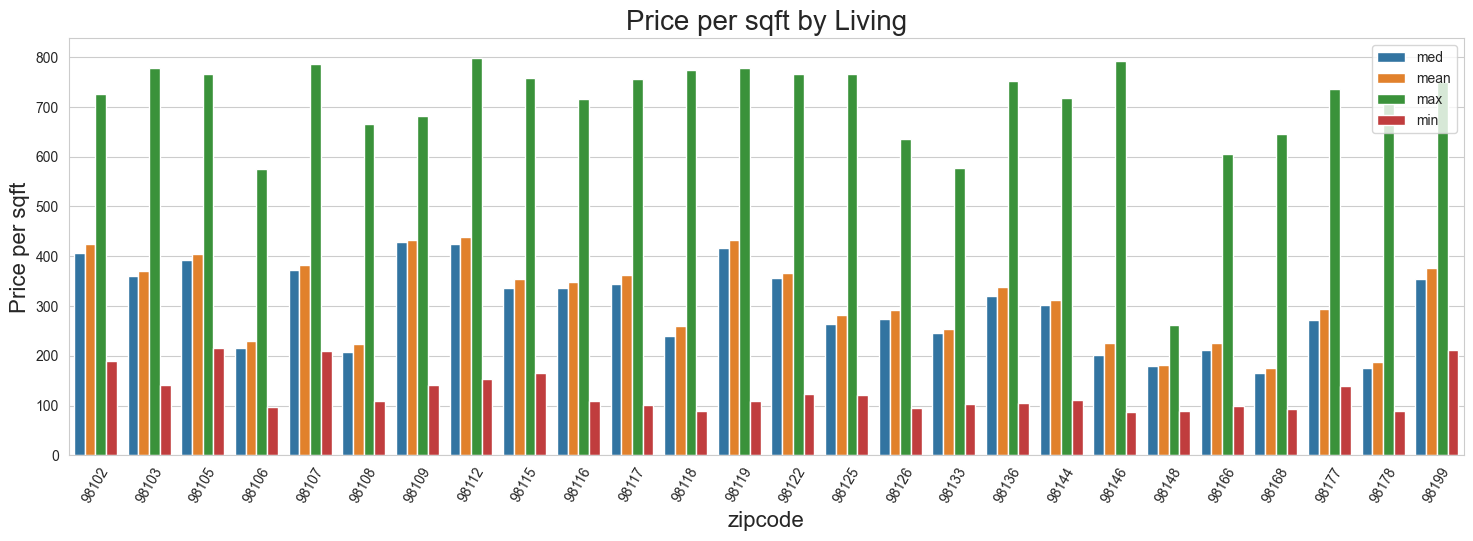

In [730]:
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
df_house_Seattle_median = df_house_Seattle.groupby('zipcode')[['price/sqft']].median().reset_index()
df_house_Seattle_median['type'] = "med"
df_house_Seattle_mean = df_house_Seattle.groupby('zipcode')[['price/sqft']].mean().reset_index()
df_house_Seattle_mean['type'] = "mean"
df_house_Seattle_max = df_house_Seattle.groupby('zipcode')[['price/sqft']].max().reset_index()
df_house_Seattle_max['type'] = "max"
df_house_Seattle_min = df_house_Seattle.groupby('zipcode')[['price/sqft']].min().reset_index()
df_house_Seattle_min['type'] = "min"
df_merged_1 = pd.concat([df_house_Seattle_median, df_house_Seattle_mean, df_house_Seattle_max, df_house_Seattle_min])


ax = sns.barplot(x='zipcode', y='price/sqft', data=df_merged_1, hue='type')

plt.title('Price per sqft by Living', fontsize=20)
plt.xlabel('zipcode', fontsize=16)
plt.ylabel('Price per sqft', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()

In [731]:
df_house_Seattle['sqft_living15/sqft_lot15'].describe()

count   8033.000
mean       0.396
std        0.269
min        0.011
25%        0.219
50%        0.313
75%        0.451
max        1.985
Name: sqft_living15/sqft_lot15, dtype: float64

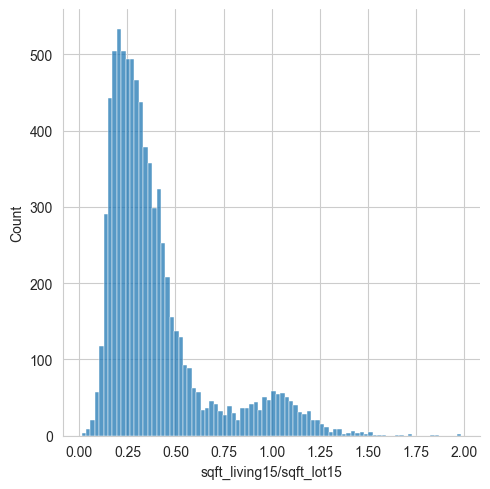

In [732]:
ax = sns.displot(x='sqft_living15/sqft_lot15', data=df_house_Seattle)

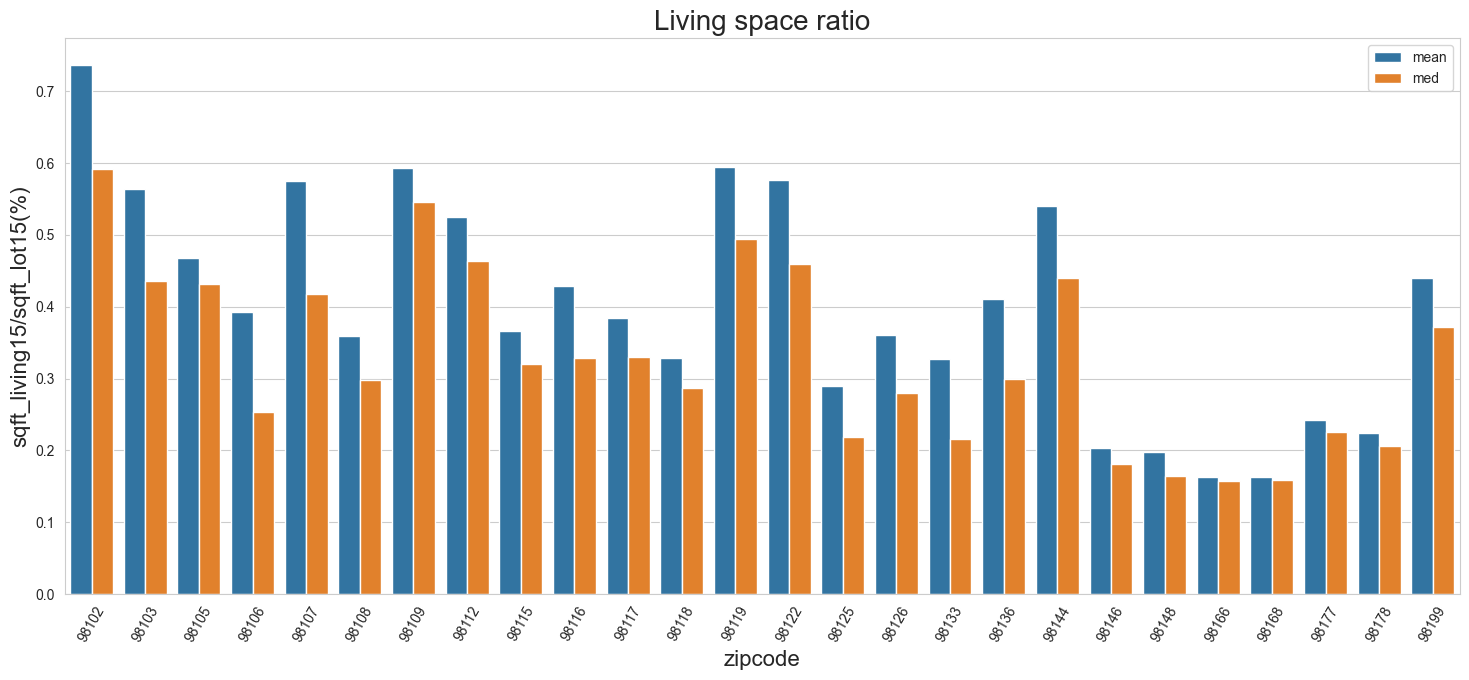

In [733]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
df_house_ls_median = df_house_Seattle.groupby('zipcode')[['sqft_living15/sqft_lot15']].median().reset_index()
df_house_ls_median['type'] = "med"
df_house_ls_mean = df_house_Seattle.groupby('zipcode')[['sqft_living15/sqft_lot15']].mean().reset_index()
df_house_ls_mean['type'] = "mean"

df_merged_3 = pd.concat([df_house_ls_mean,df_house_ls_median])


ax = sns.barplot(x='zipcode', y='sqft_living15/sqft_lot15', data=df_merged_3, hue='type')

plt.title('Living space ratio', fontsize=20)
plt.xlabel('zipcode', fontsize=16)
plt.ylabel('sqft_living15/sqft_lot15(%)', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()

### Analysing prices and living conditions in 5 areas

In [734]:
df_house_Seattle.columns
df_selected = df_house_Seattle[df_house_Seattle['zipcode'].isin(['98102', '98109', '98112', '98119', '98107'])]
df_selected['sqft_living'].max()
df_selected_1 = df_selected[df_selected['sqft_living'] != 12050.0]


In [735]:
import seaborn.objects as so
import matplotlib.pyplot as plt





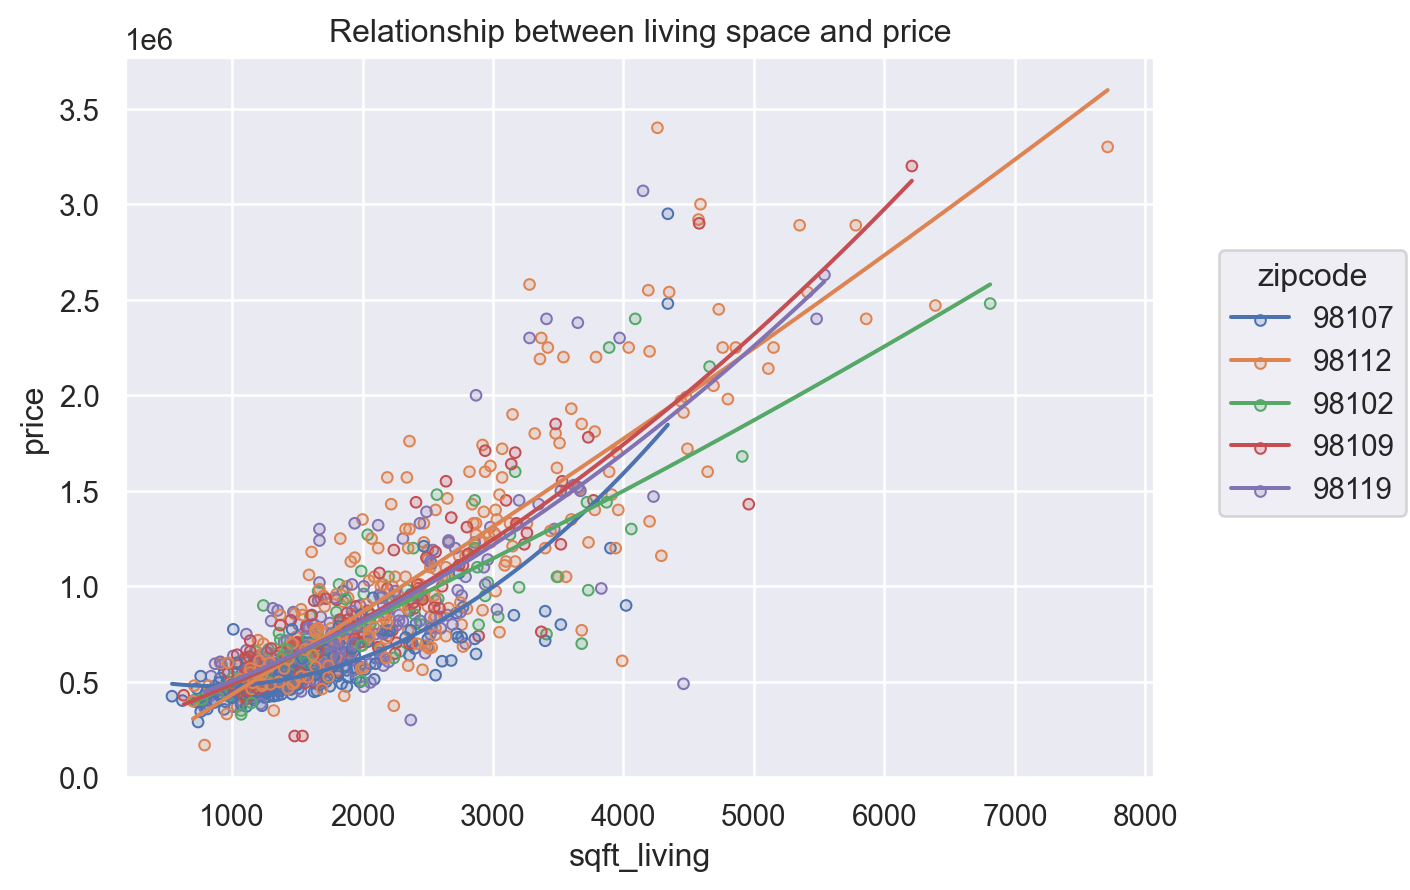

In [736]:
p2= (
    so.Plot(df_selected_1, y="price", x="sqft_living", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p2.label(title="Relationship between living space and price")


Text(40.282454861111106, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

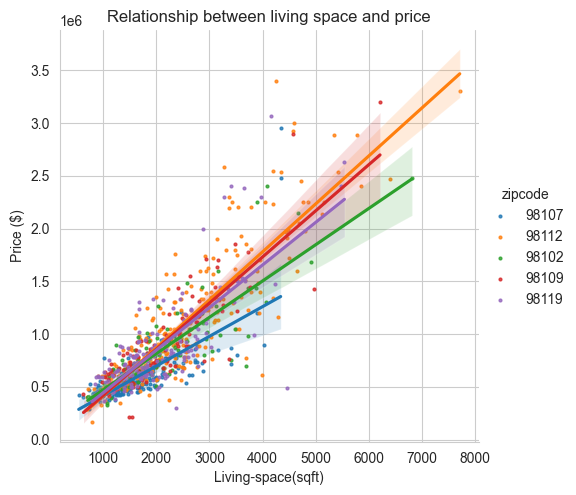

In [801]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="sqft_living", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between living space and price")
plt.xlabel("Living-space(sqft)")
plt.ylabel("Price ($)")


The bigger, the more expensive

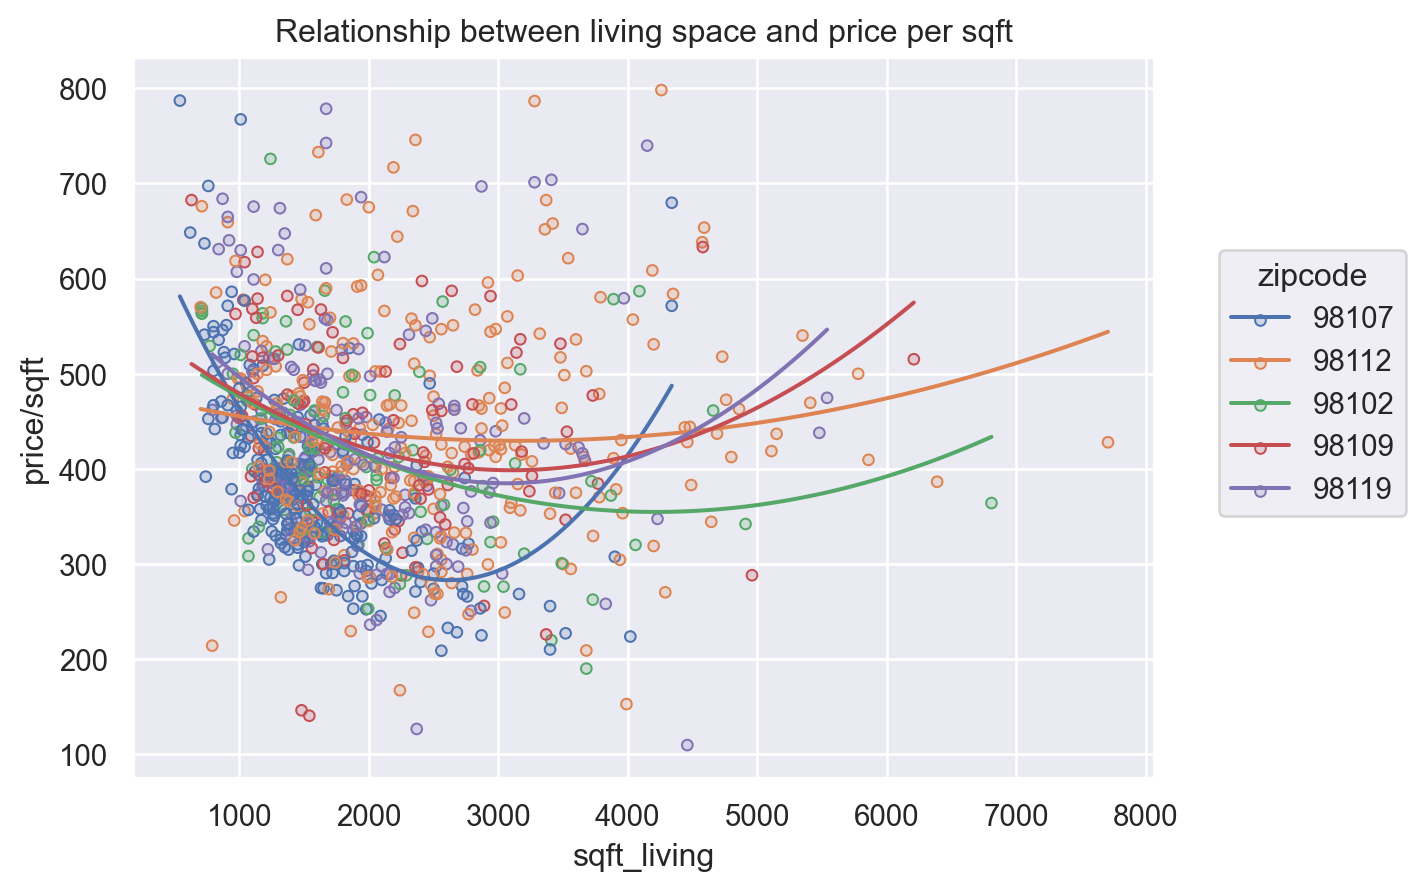

In [737]:
p= (
    so.Plot(df_selected_1, y="price/sqft", x="sqft_living", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p.label(title="Relationship between living space and price per sqft")




Text(40.969298611111114, 0.5, 'Price/sqft ($)')

<Figure size 1800x400 with 0 Axes>

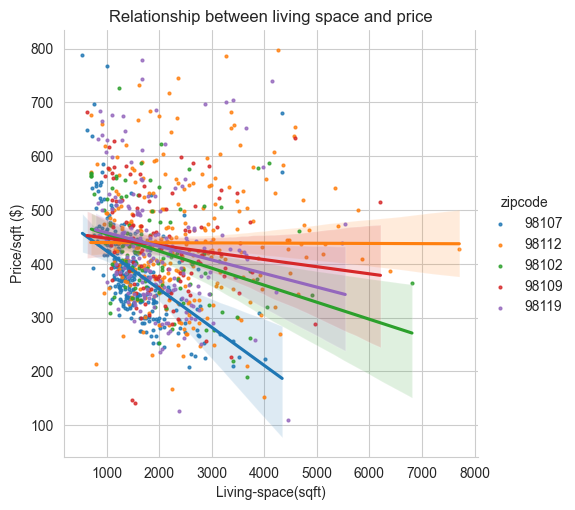

In [802]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="sqft_living", y="price/sqft", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between living space and price/sqft")
plt.xlabel("Living-space(sqft)")
plt.ylabel("Price/sqft ($)")


Price per sqft has a lowest points(not the smallest not the biggest)
most between $300-$500 per sqft

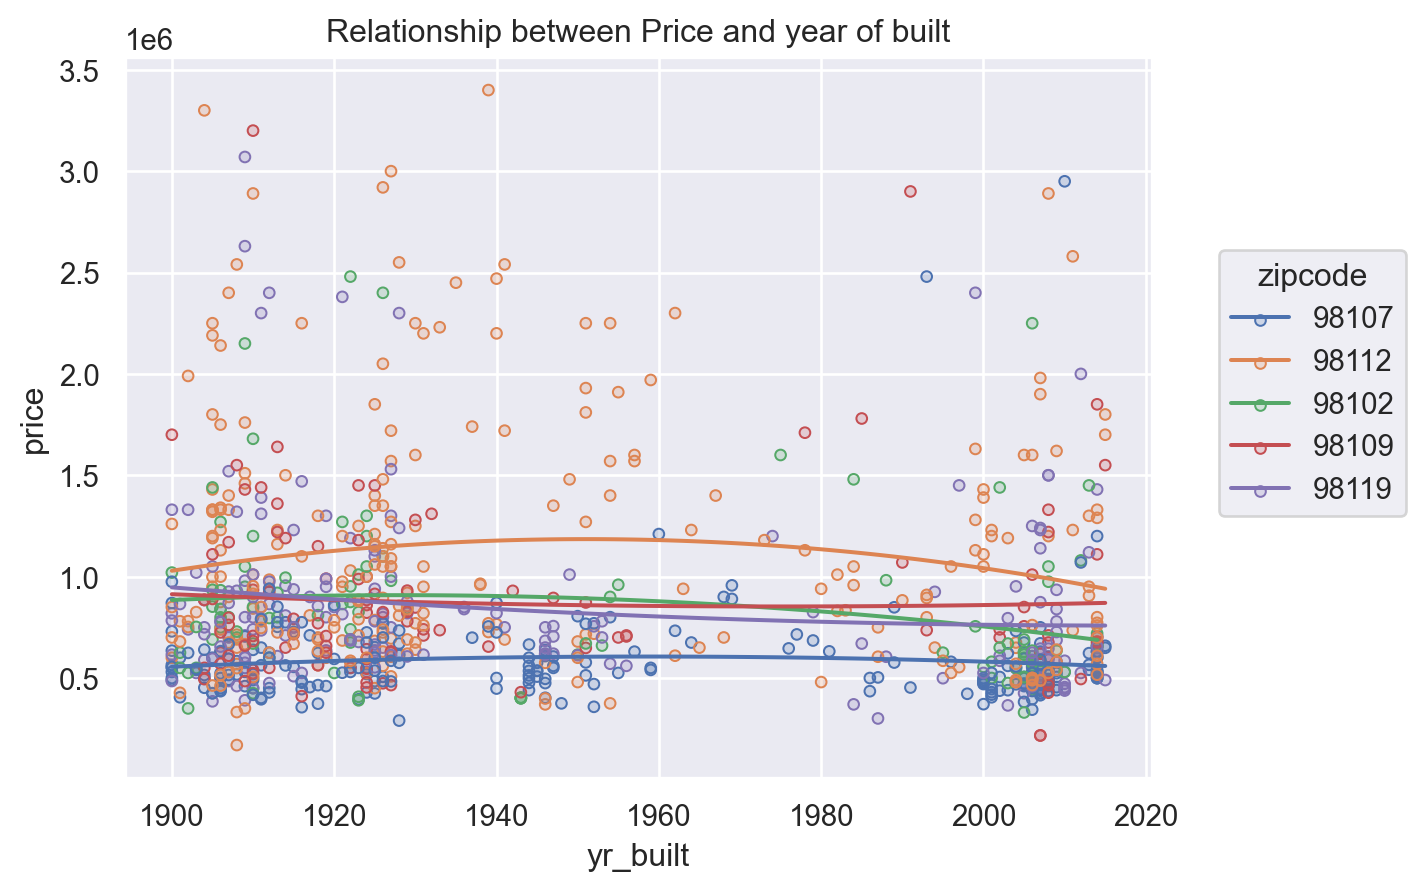

In [738]:
p1=(
    so.Plot(df_selected_1, y="price", x="yr_built", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

p1.label(title="Relationship between Price and year of built")

<Figure size 1800x400 with 0 Axes>

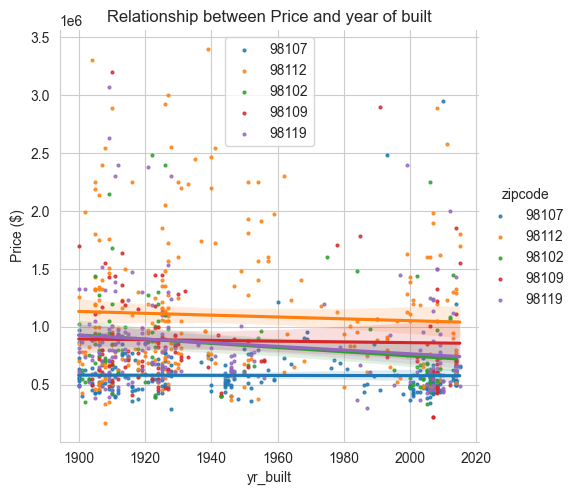

In [805]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="yr_built", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price and year of built")
plt.xlabel("yr_built")
plt.ylabel("Price ($)")



Text(40.969298611111114, 0.5, 'Price/sqft($)')

<Figure size 1800x400 with 0 Axes>

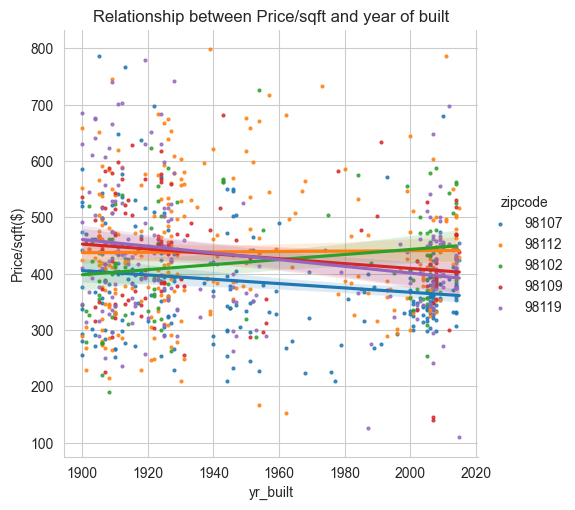

In [806]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="yr_built", y="price/sqft", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price/sqft and year of built")
plt.xlabel("yr_built")
plt.ylabel("Price/sqft($)")

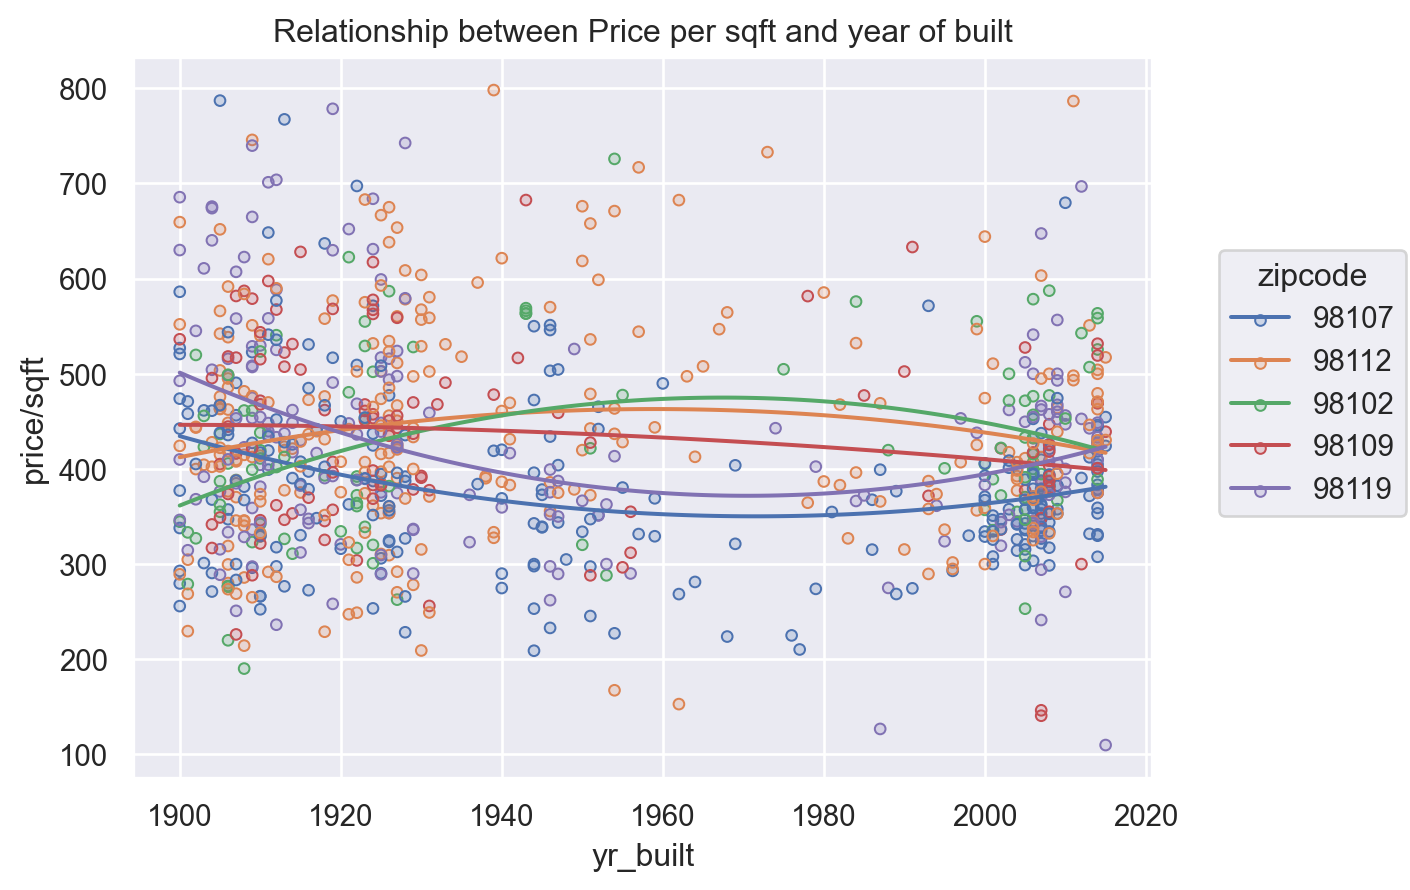

In [739]:
p3=(
    so.Plot(df_selected_1, y="price/sqft", x="yr_built", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p3.label(title="Relationship between Price per sqft and year of built")

There is no clear correlation between price(price per sqft) and year of built

(1960-1980) less houses

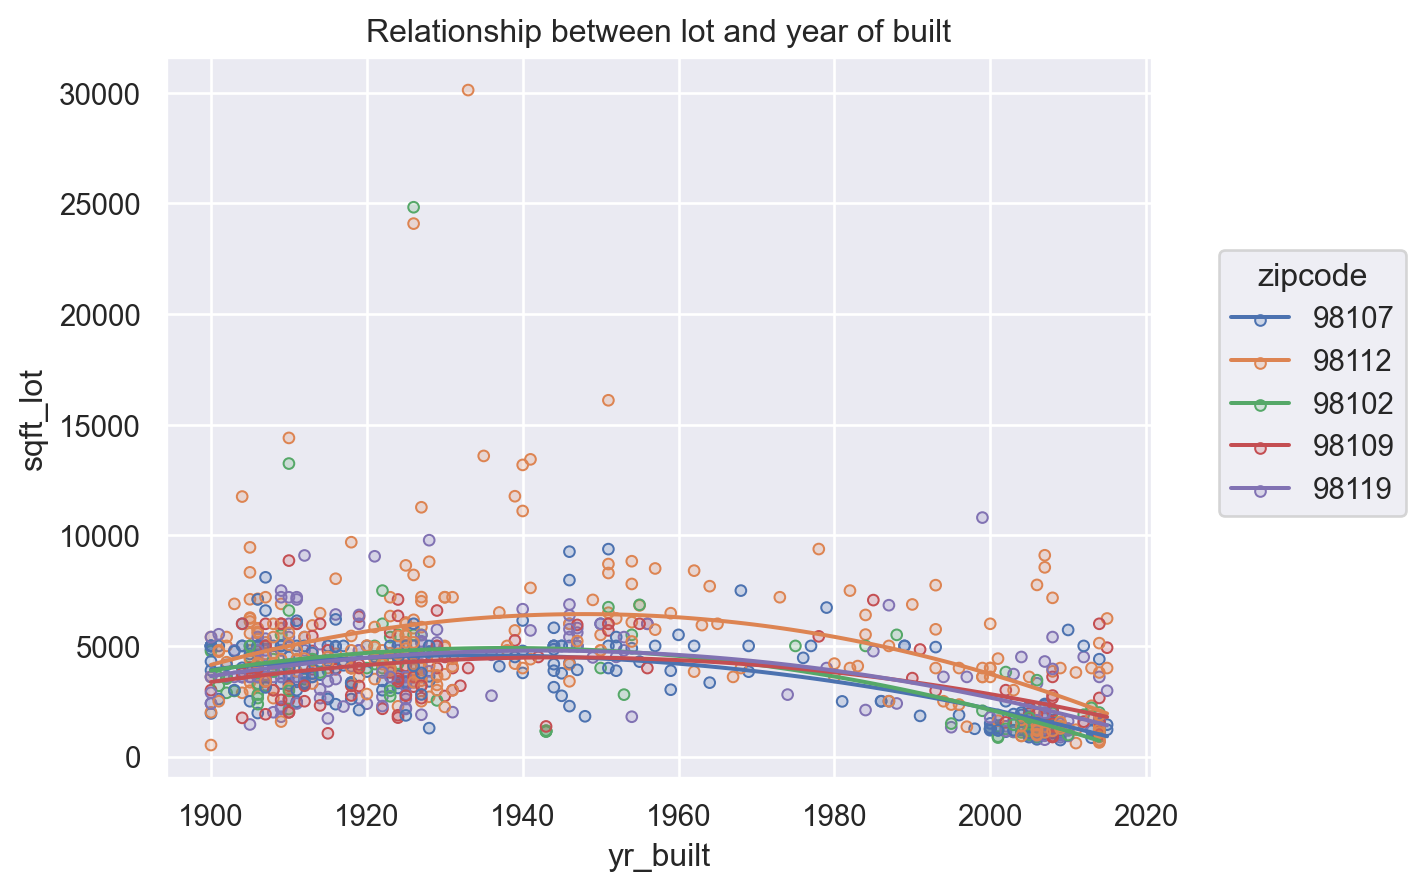

In [740]:
p4=(
    so.Plot(df_selected_1, y="sqft_lot", x="yr_built", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p4.label(title="Relationship between lot and year of built")

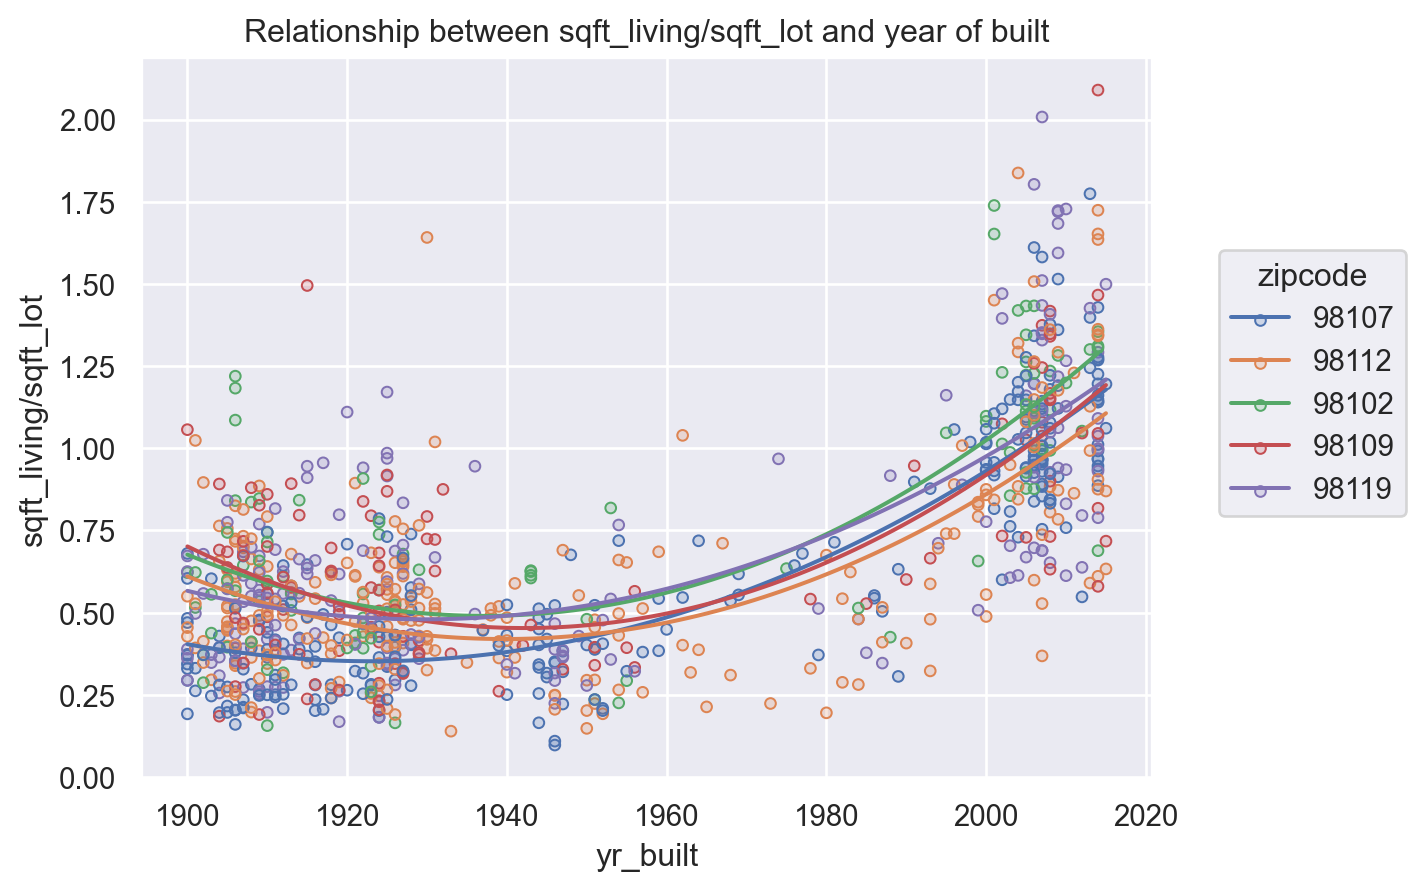

In [741]:
df_selected_2 = df_selected_1[df_selected_1['sqft_living/sqft_lot']<3]
p5=(
    so.Plot(df_selected_2, y="sqft_living/sqft_lot", x="yr_built", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p5.label(title="Relationship between sqft_living/sqft_lot and year of built")


Text(38.38747439236112, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

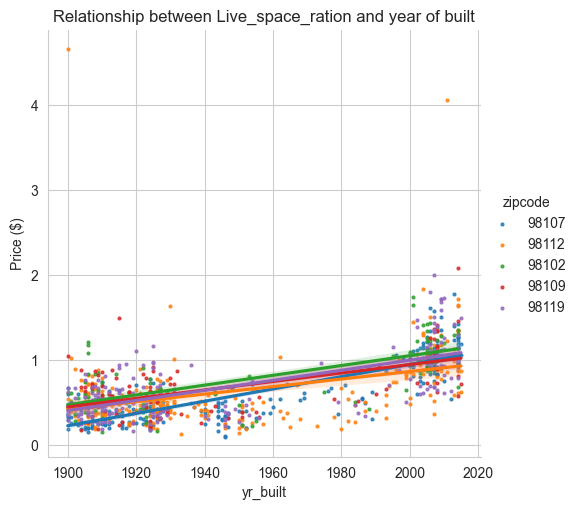

In [808]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="yr_built", y="sqft_living/sqft_lot", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Live_space_ration and year of built")
plt.xlabel("yr_built")
plt.ylabel("Price ($)")

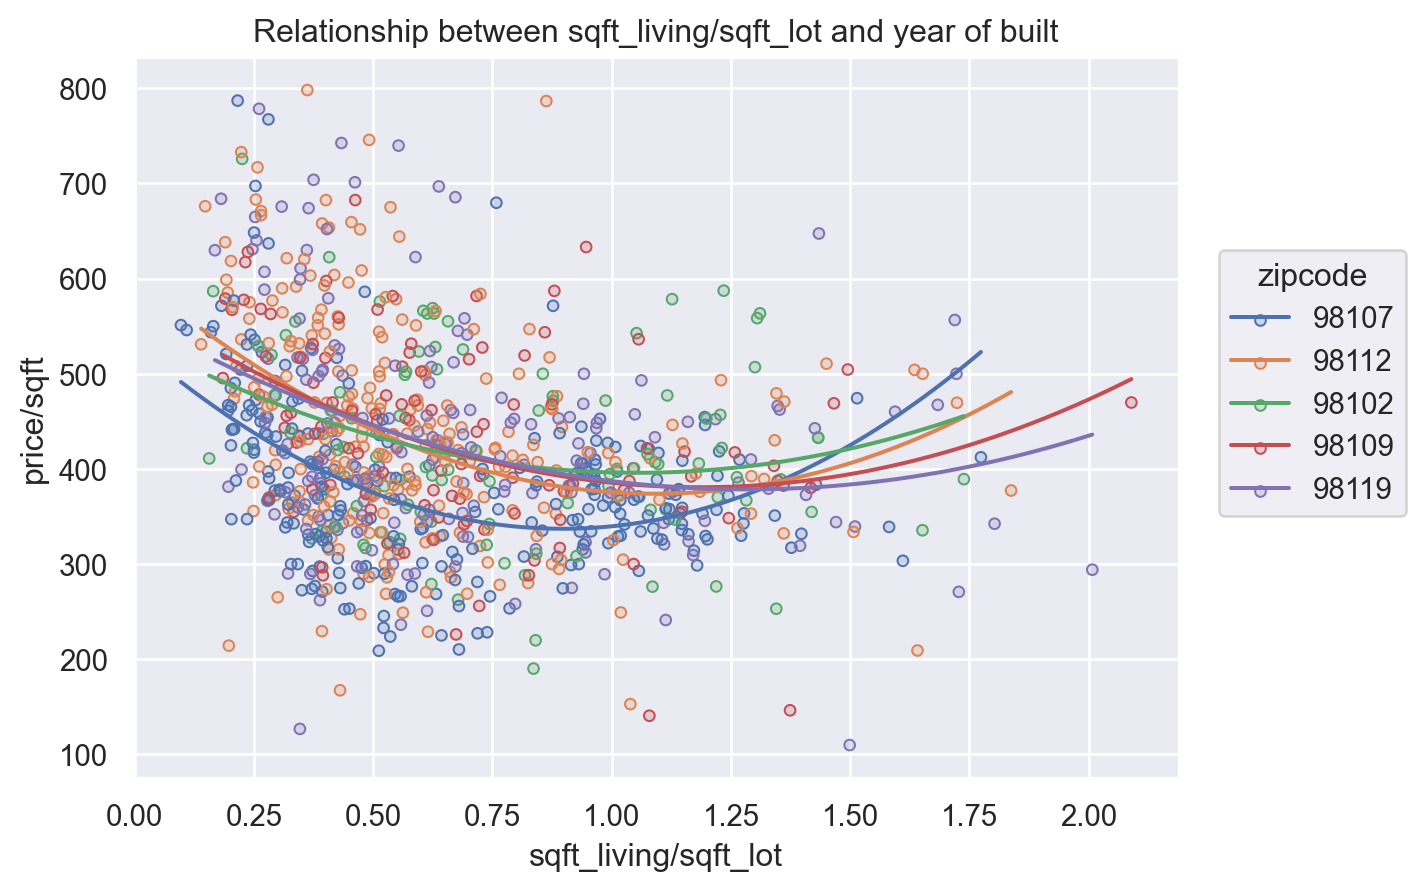

In [742]:
df_selected_2 = df_selected_1[df_selected_1['sqft_living/sqft_lot']<3]
p51=(
    so.Plot(df_selected_2, y="price/sqft", x="sqft_living/sqft_lot", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p51.label(title="Relationship between sqft_living/sqft_lot and year of built")

In [743]:

df_selected_1['yr_renovated'] = pd.to_datetime(df_selected_1['yr_renovated'])

# 提取年份
df_selected_1['yr_re'] = df_selected_1['yr_renovated'].dt.year
df_selected_1['yr_renovated'].describe()


count                              767
mean     1970-01-01 00:00:00.000001564
min                1970-01-01 00:00:00
25%                1970-01-01 00:00:00
50%                1970-01-01 00:00:00
75%                1970-01-01 00:00:00
max      1970-01-01 00:00:00.000020150
Name: yr_renovated, dtype: object

for new houses,the living space ration(sqft_living/sqft_lot) is higher

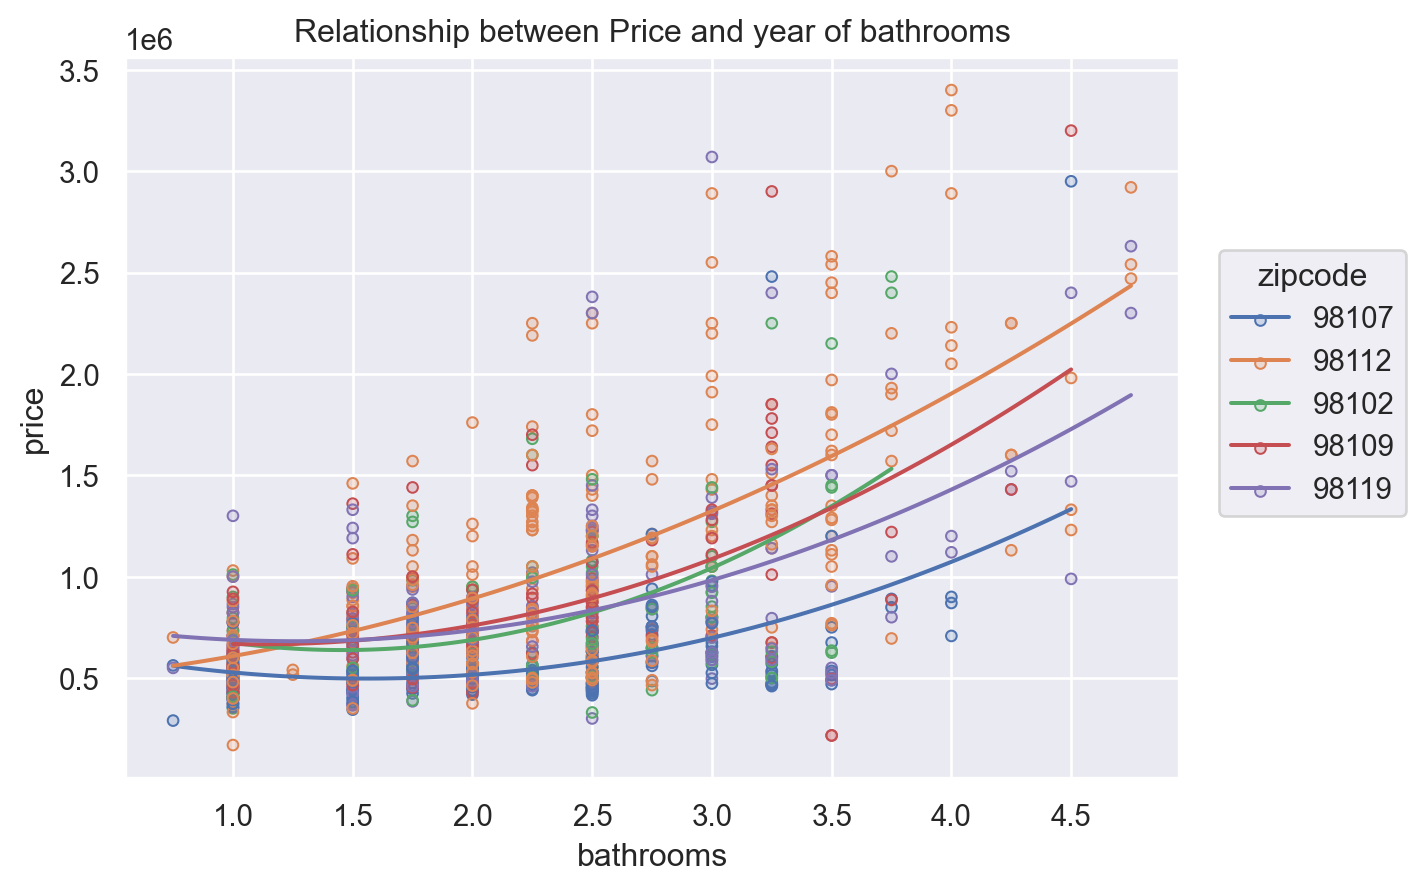

In [744]:

p6=(
    so.Plot(df_selected_1, y="price", x="bathrooms", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p6.label(title="Relationship between Price and bathrooms")

Text(40.282454861111106, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

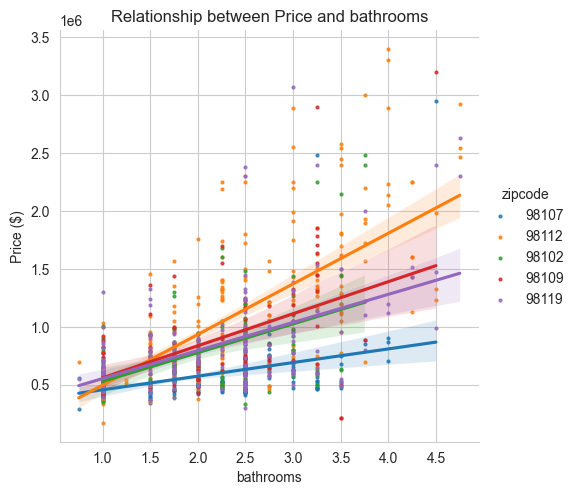

In [810]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="bathrooms", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price and bathrooms")
plt.xlabel("bathrooms")
plt.ylabel("Price ($)")

In [809]:
df_selected_a = df_selected_1[(df_selected_1['bedrooms'] < 7) & (df_selected_1['bedrooms'] > 1)]


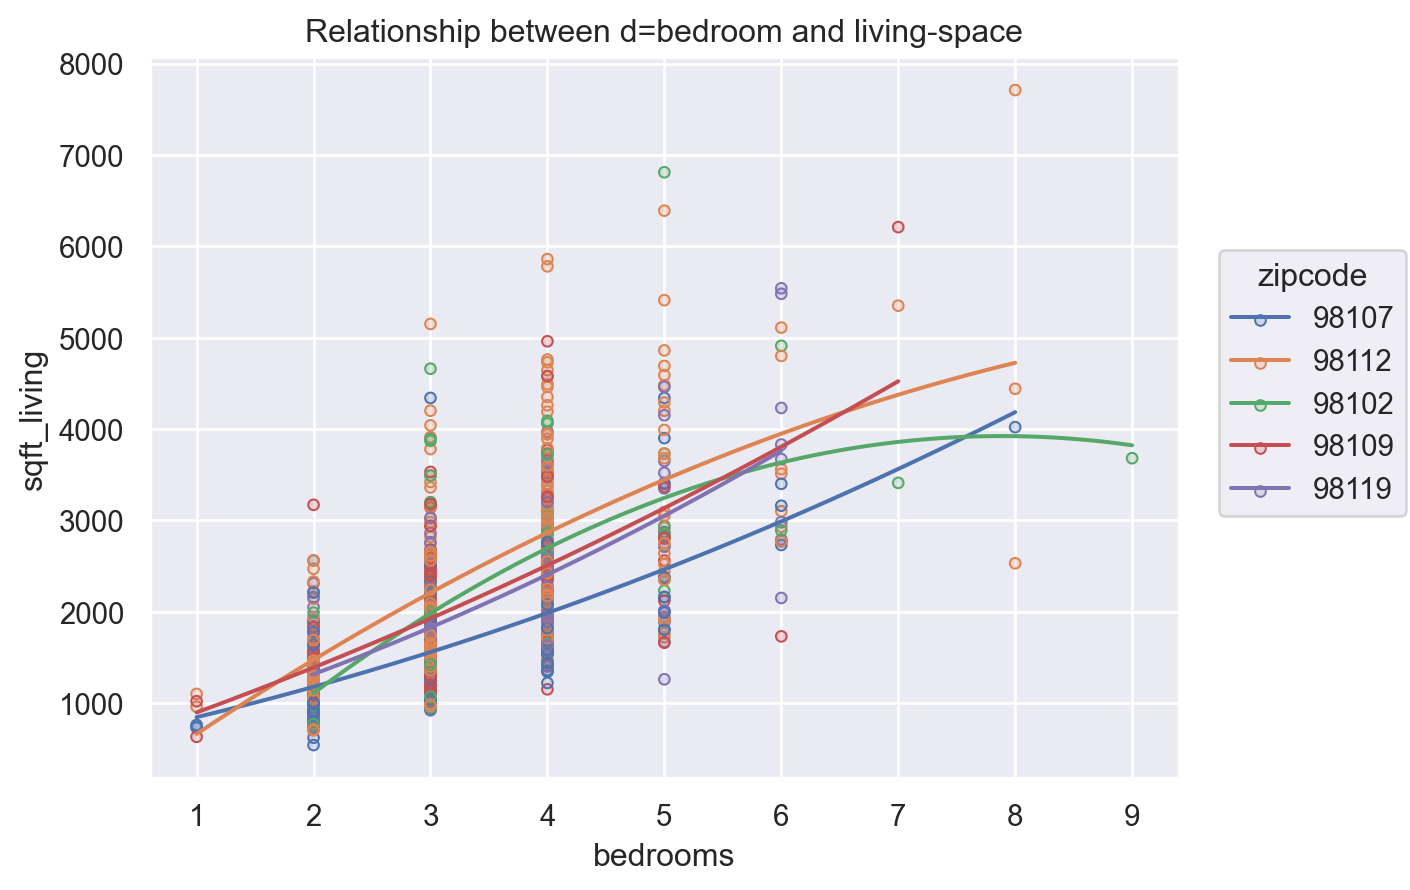

In [749]:
p10=(
    so.Plot(df_selected_1, y="sqft_living", x="bedrooms", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p10.label(title="Relationship between d=bedroom and living-space")

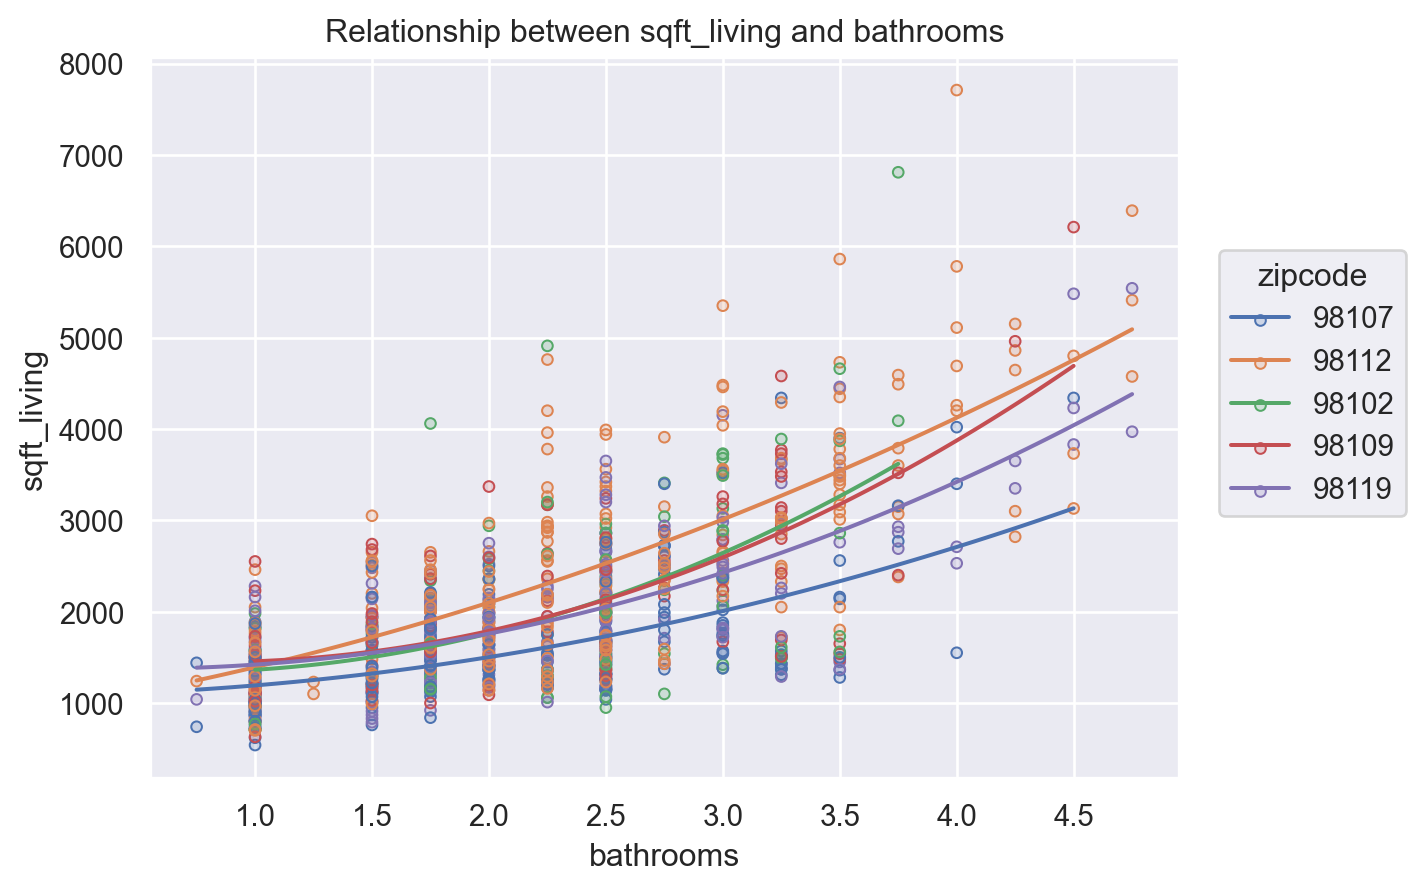

In [750]:
p101=(
    so.Plot(df_selected_1, y="sqft_living", x="bathrooms", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p101.label(title="Relationship between sqft_living and bathrooms")

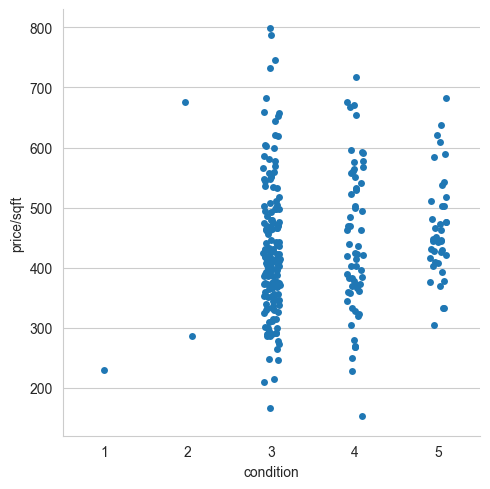

In [751]:
df_selected_112 = df_selected_1[df_selected_1['zipcode'] == "98112"]
df_selected_107 = df_selected_1[df_selected_1['zipcode'] == "98107"]
df_selected_102 = df_selected_1[df_selected_1['zipcode'] == "98102"]
df_selected_109 = df_selected_1[df_selected_1['zipcode'] == "98109"]
df_selected_119 = df_selected_1[df_selected_1['zipcode'] == "98119"]

sns.catplot(data=df_selected_112, x="condition", y="price/sqft")

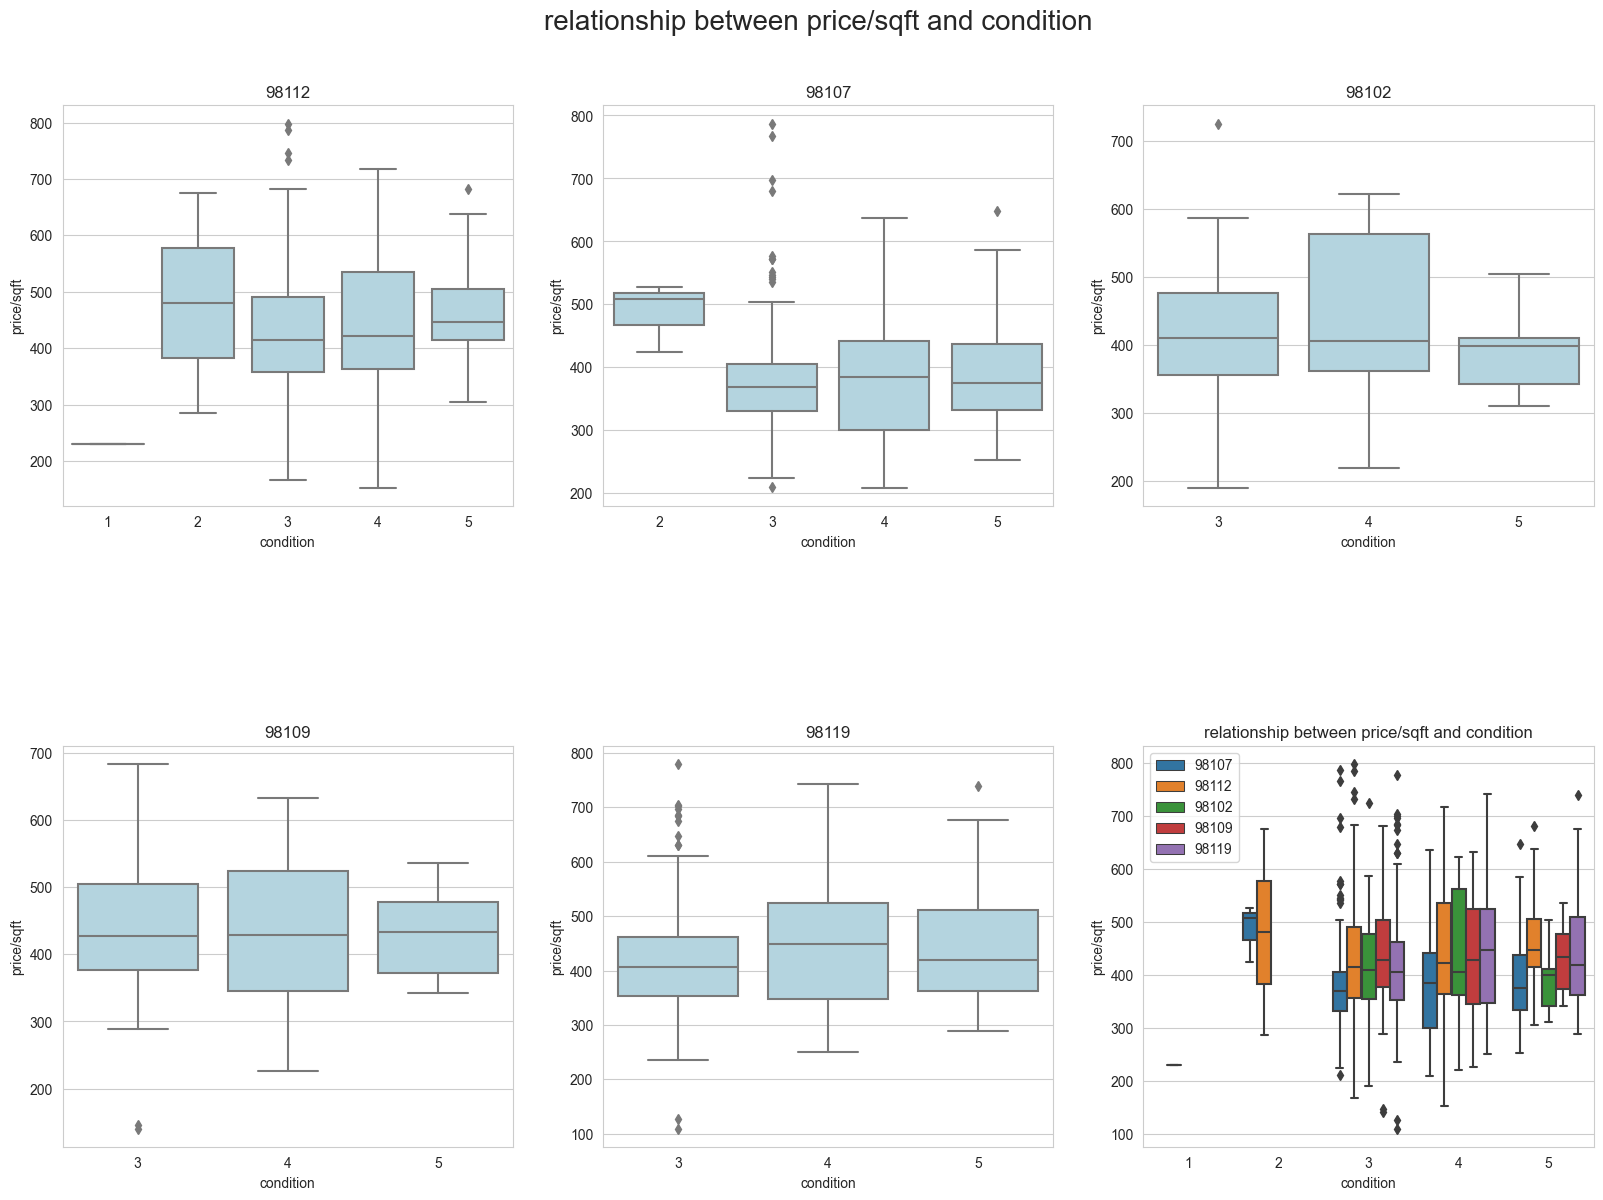

In [752]:
# relationship between price/sqft and condition
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price/sqft and condition', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["condition"], y = df_selected_112['price/sqft'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["condition"], y = df_selected_107['price/sqft'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["condition"], y = df_selected_102['price/sqft'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["condition"], y = df_selected_109['price/sqft'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["condition"], y = df_selected_119['price/sqft'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='condition', y ='price/sqft',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between price/sqft and condition")
f6.legend()
# ax = sns.barplot(x='area', y='price/sqft_living', data=df_merged, hue='type')


In [753]:
df_selected_1['zipcode'].info()

<class 'pandas.core.series.Series'>
Index: 928 entries, 78 to 21419
Series name: zipcode
Non-Null Count  Dtype 
--------------  ----- 
928 non-null    object
dtypes: object(1)
memory usage: 46.8+ KB


In [754]:
df_selected['yr_built'].max()


2015

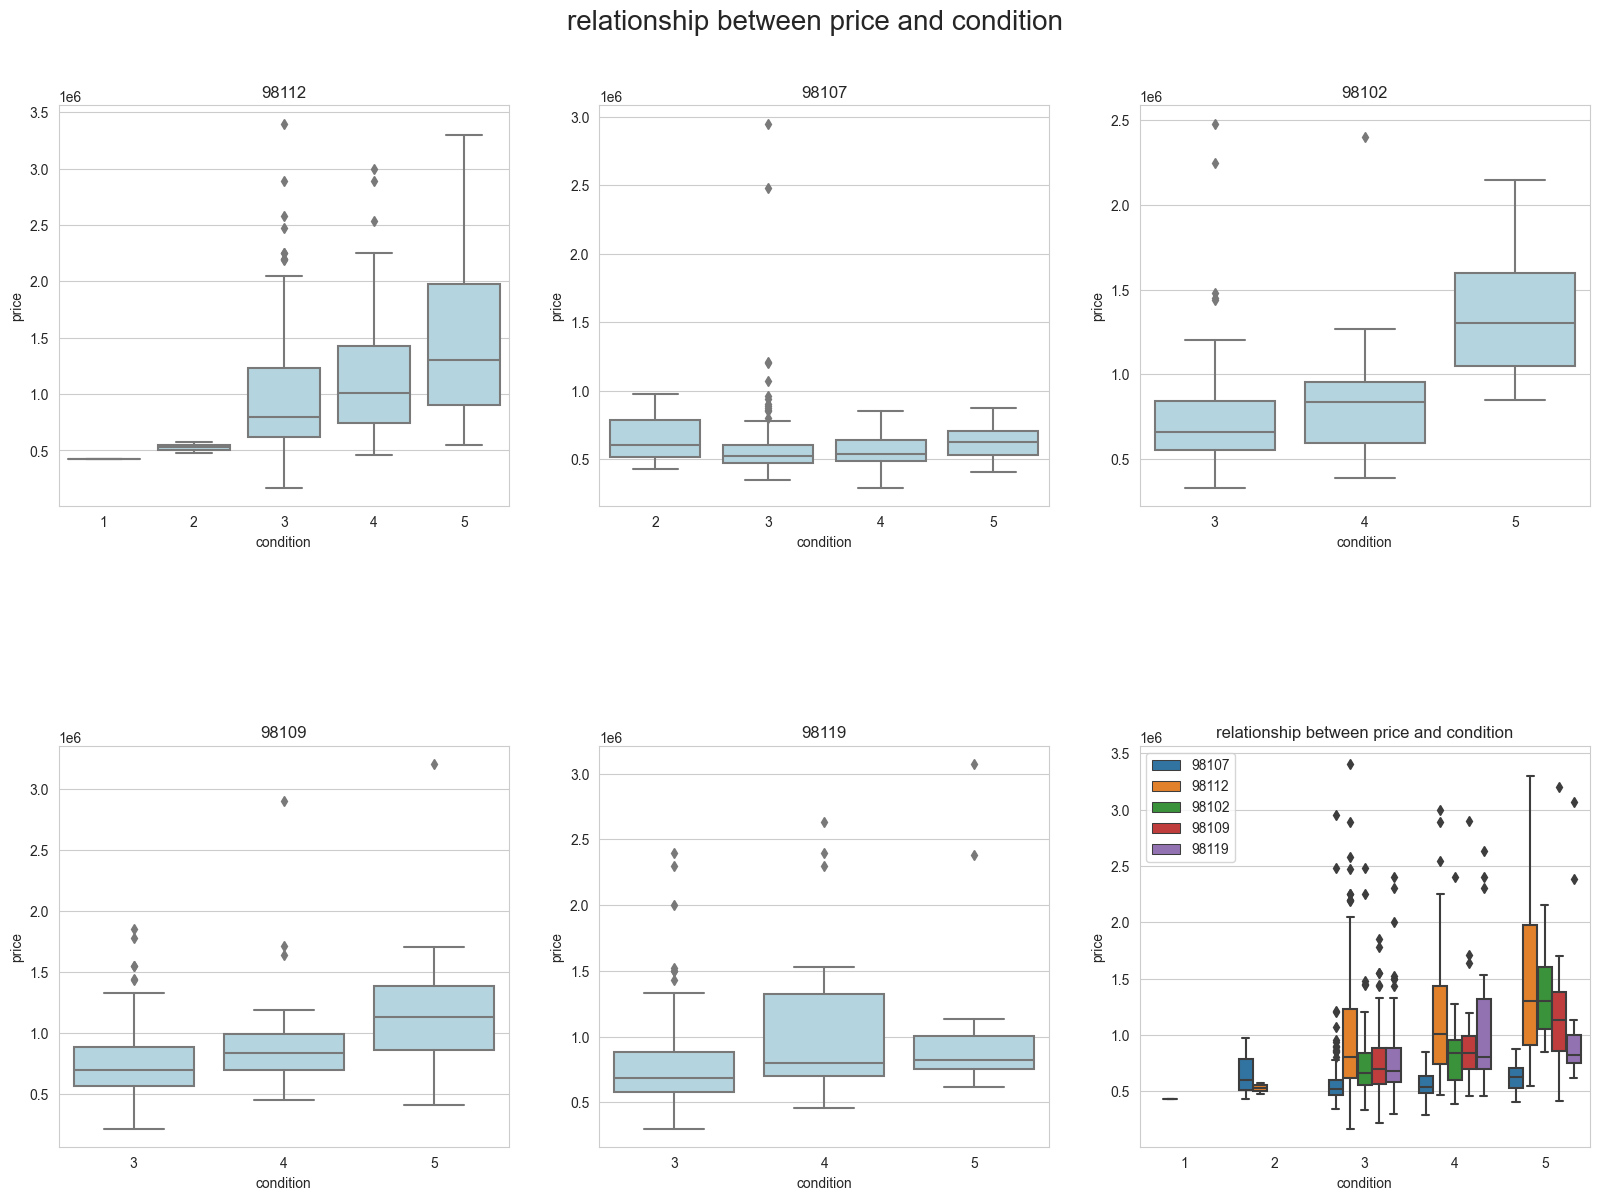

In [755]:
# relationship between price and condition
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price and condition', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["condition"], y = df_selected_112['price'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["condition"], y = df_selected_107['price'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["condition"], y = df_selected_102['price'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["condition"], y = df_selected_109['price'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["condition"], y = df_selected_119['price'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='condition', y ='price',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between price and condition")
f6.legend()
# ax = sns.barplot(x='area', y='avg_price_living', data=df_merged, hue='type')

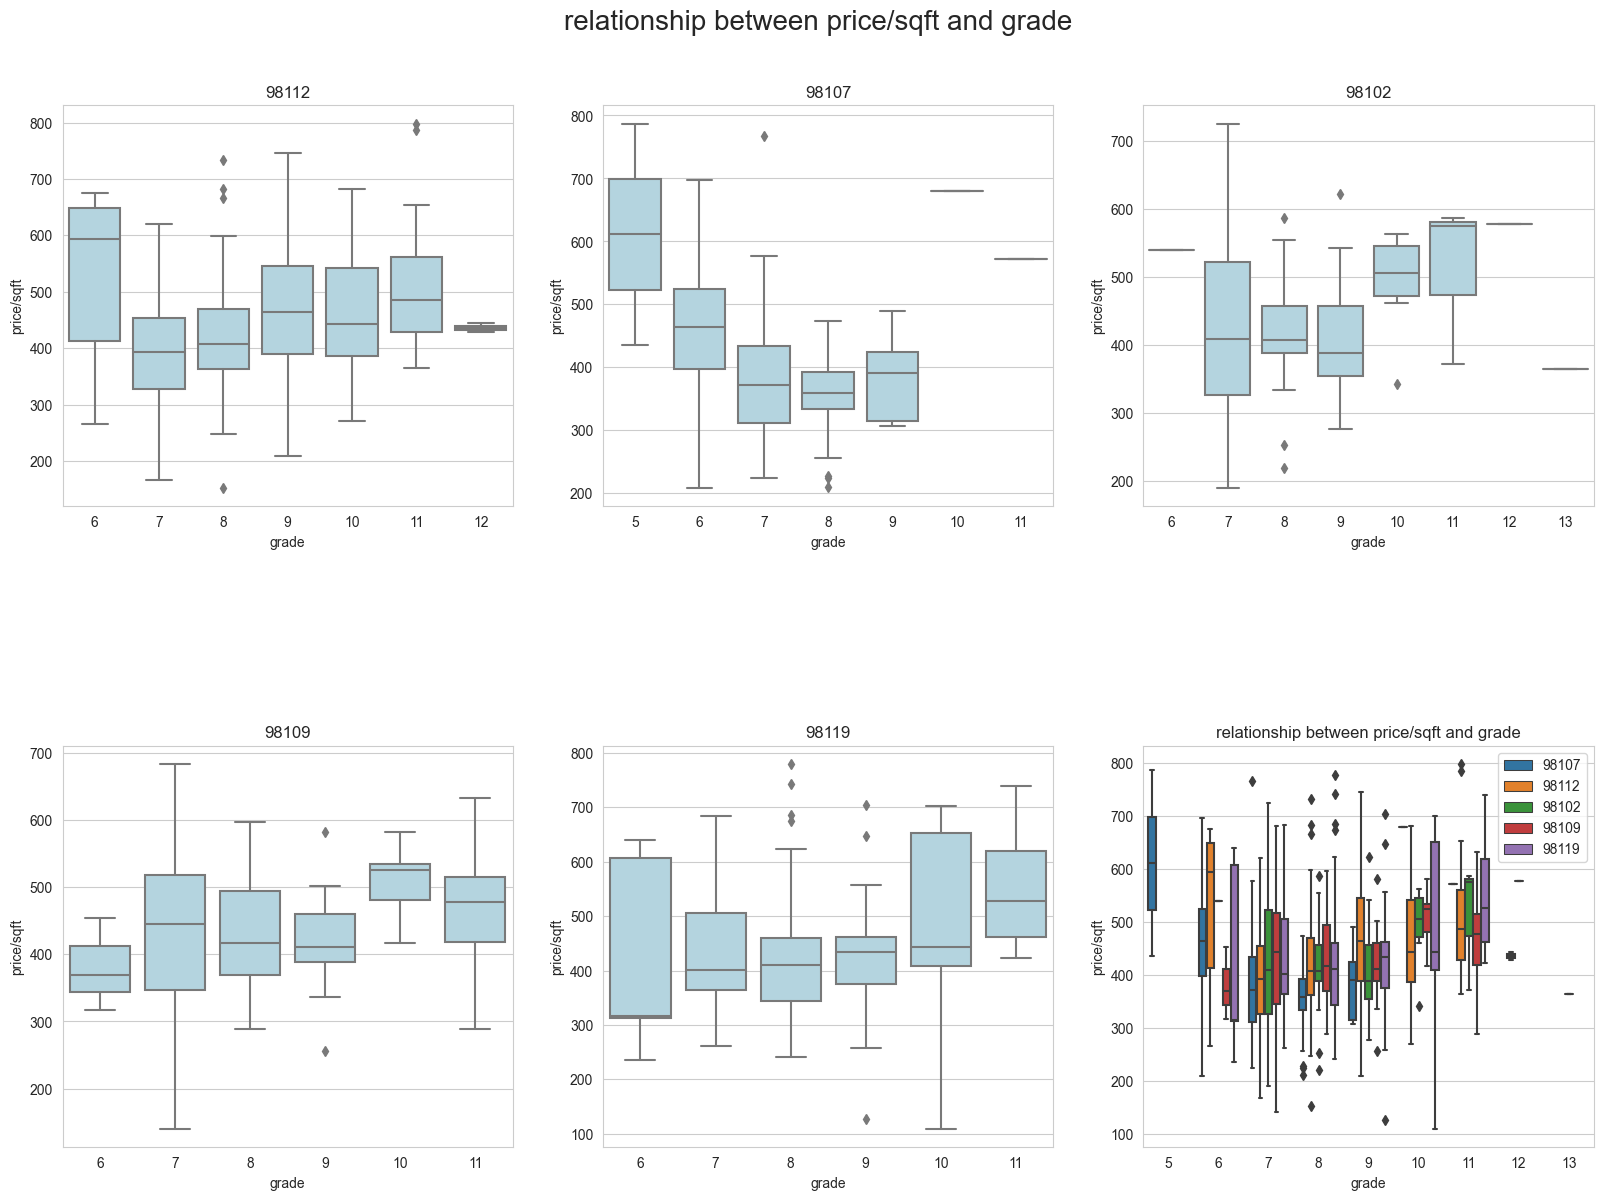

In [756]:
# relationship between price/sqt and grade
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price/sqft and grade', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["grade"], y = df_selected_112['price/sqft'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["grade"], y = df_selected_107['price/sqft'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["grade"], y = df_selected_102['price/sqft'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["grade"], y = df_selected_109['price/sqft'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["grade"], y = df_selected_119['price/sqft'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='grade', y ='price/sqft',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between price/sqft and grade")
f6.legend()

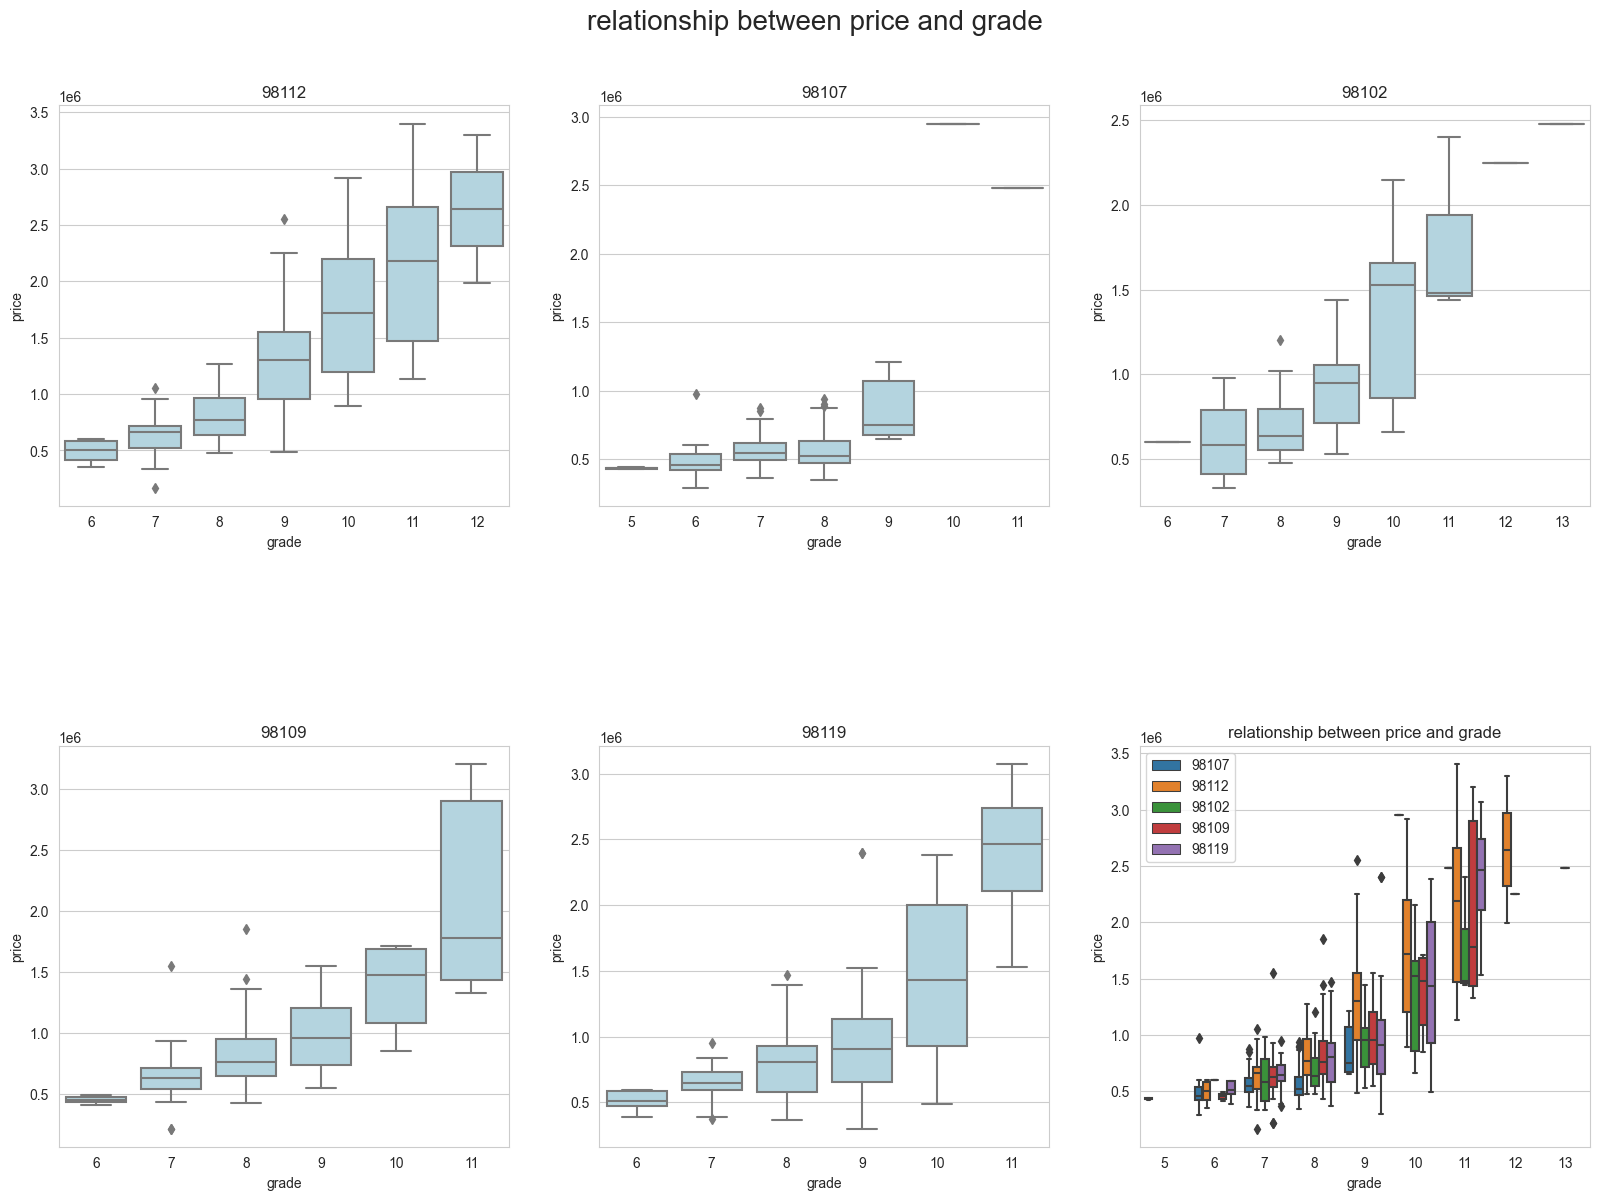

In [757]:
# relationship between price and grade
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price and grade', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["grade"], y = df_selected_112['price'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["grade"], y = df_selected_107['price'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["grade"], y = df_selected_102['price'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["grade"], y = df_selected_109['price'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["grade"], y = df_selected_119['price'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='grade', y ='price',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between price and grade")
f6.legend()

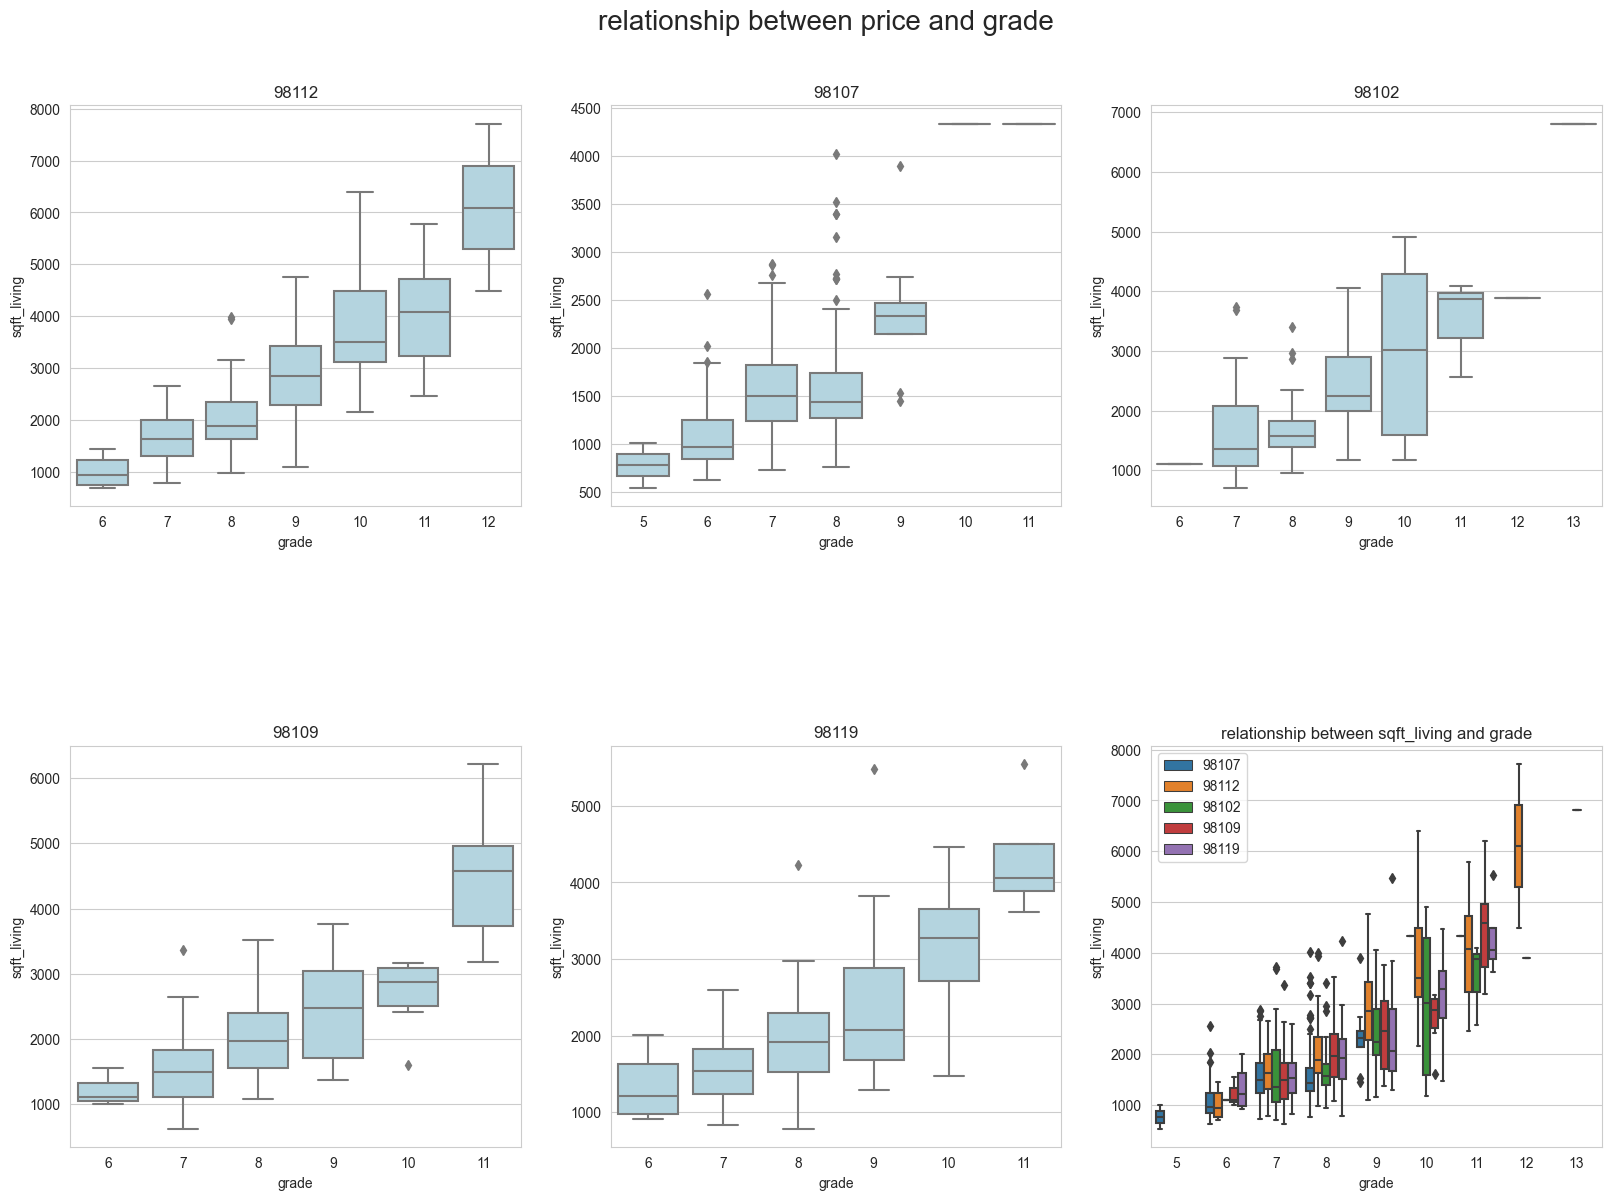

In [758]:
# relationship between sqft_living and grade
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price and grade', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["grade"], y = df_selected_112['sqft_living'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["grade"], y = df_selected_107['sqft_living'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["grade"], y = df_selected_102['sqft_living'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["grade"], y = df_selected_109['sqft_living'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["grade"], y = df_selected_119['sqft_living'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='grade', y ='sqft_living',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between sqft_living and grade")
f6.legend()

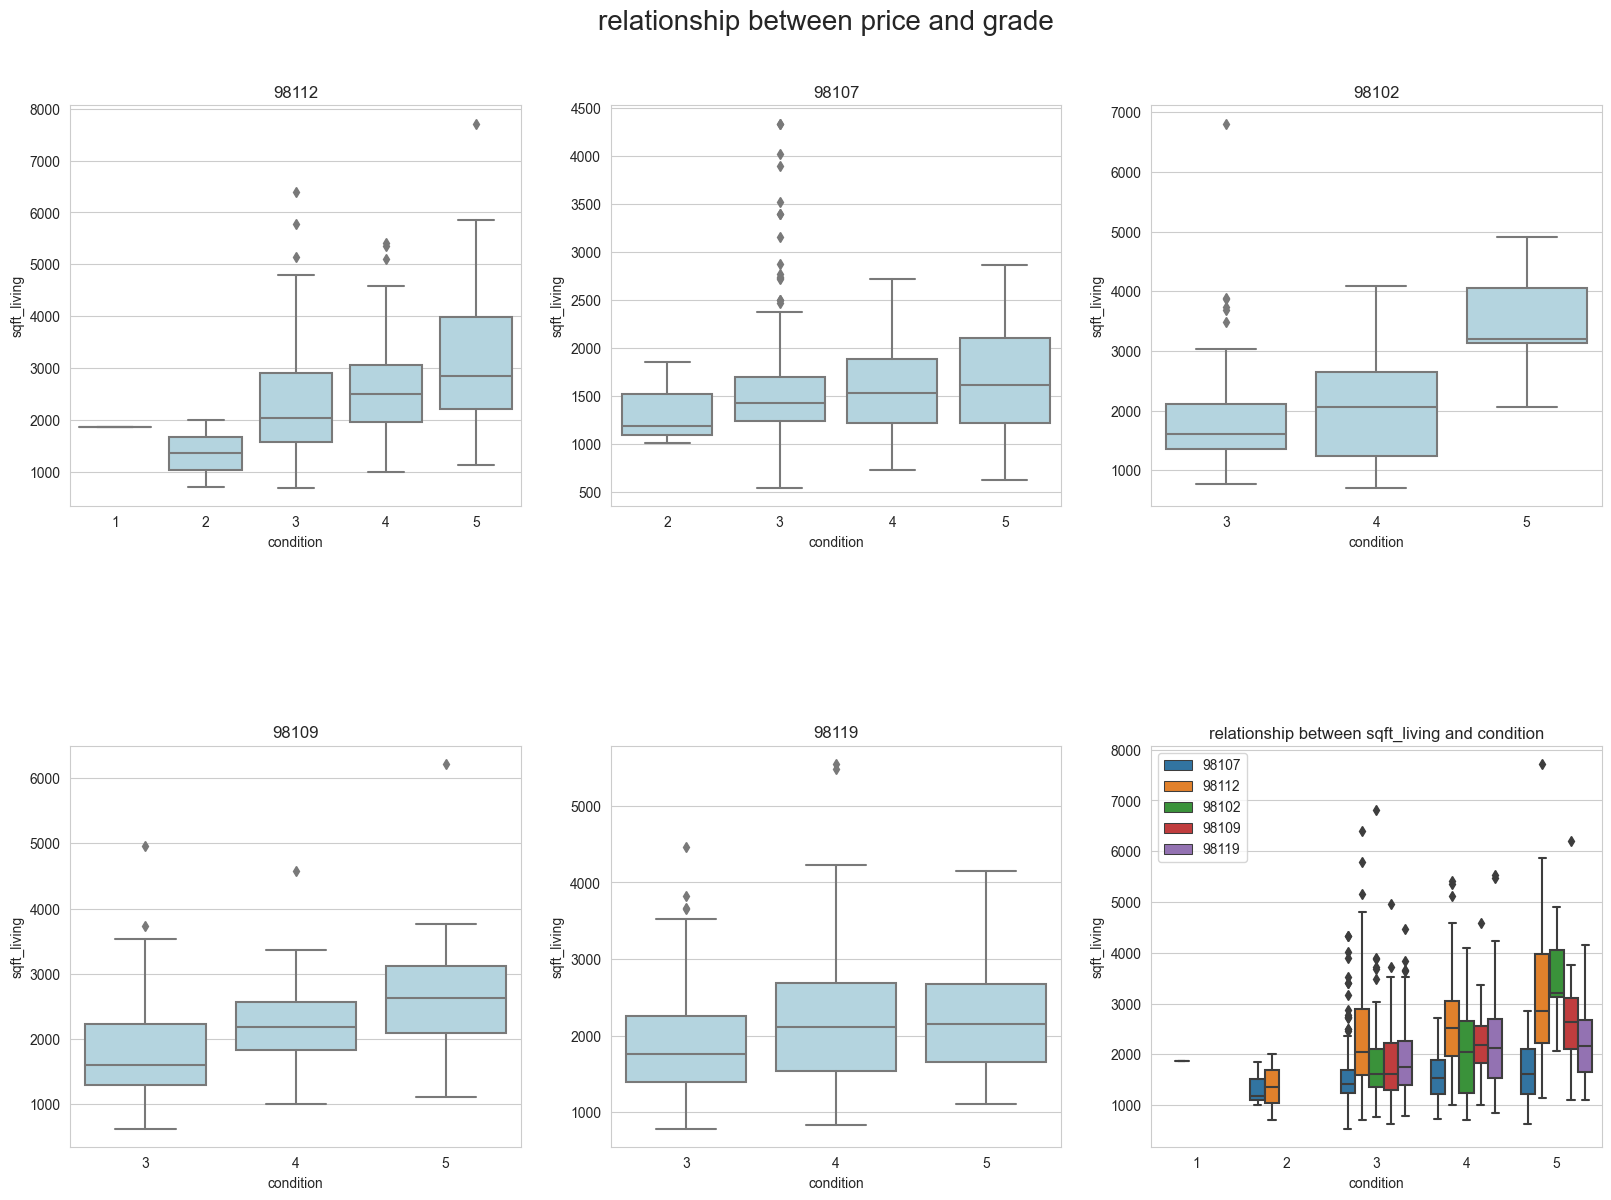

In [759]:
# relationship between sqft_living and condition
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price and grade', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["condition"], y = df_selected_112['sqft_living'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["condition"], y = df_selected_107['sqft_living'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["condition"], y = df_selected_102['sqft_living'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["condition"], y = df_selected_109['sqft_living'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["condition"], y = df_selected_119['sqft_living'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='condition', y ='sqft_living',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between sqft_living and condition")
f6.legend()

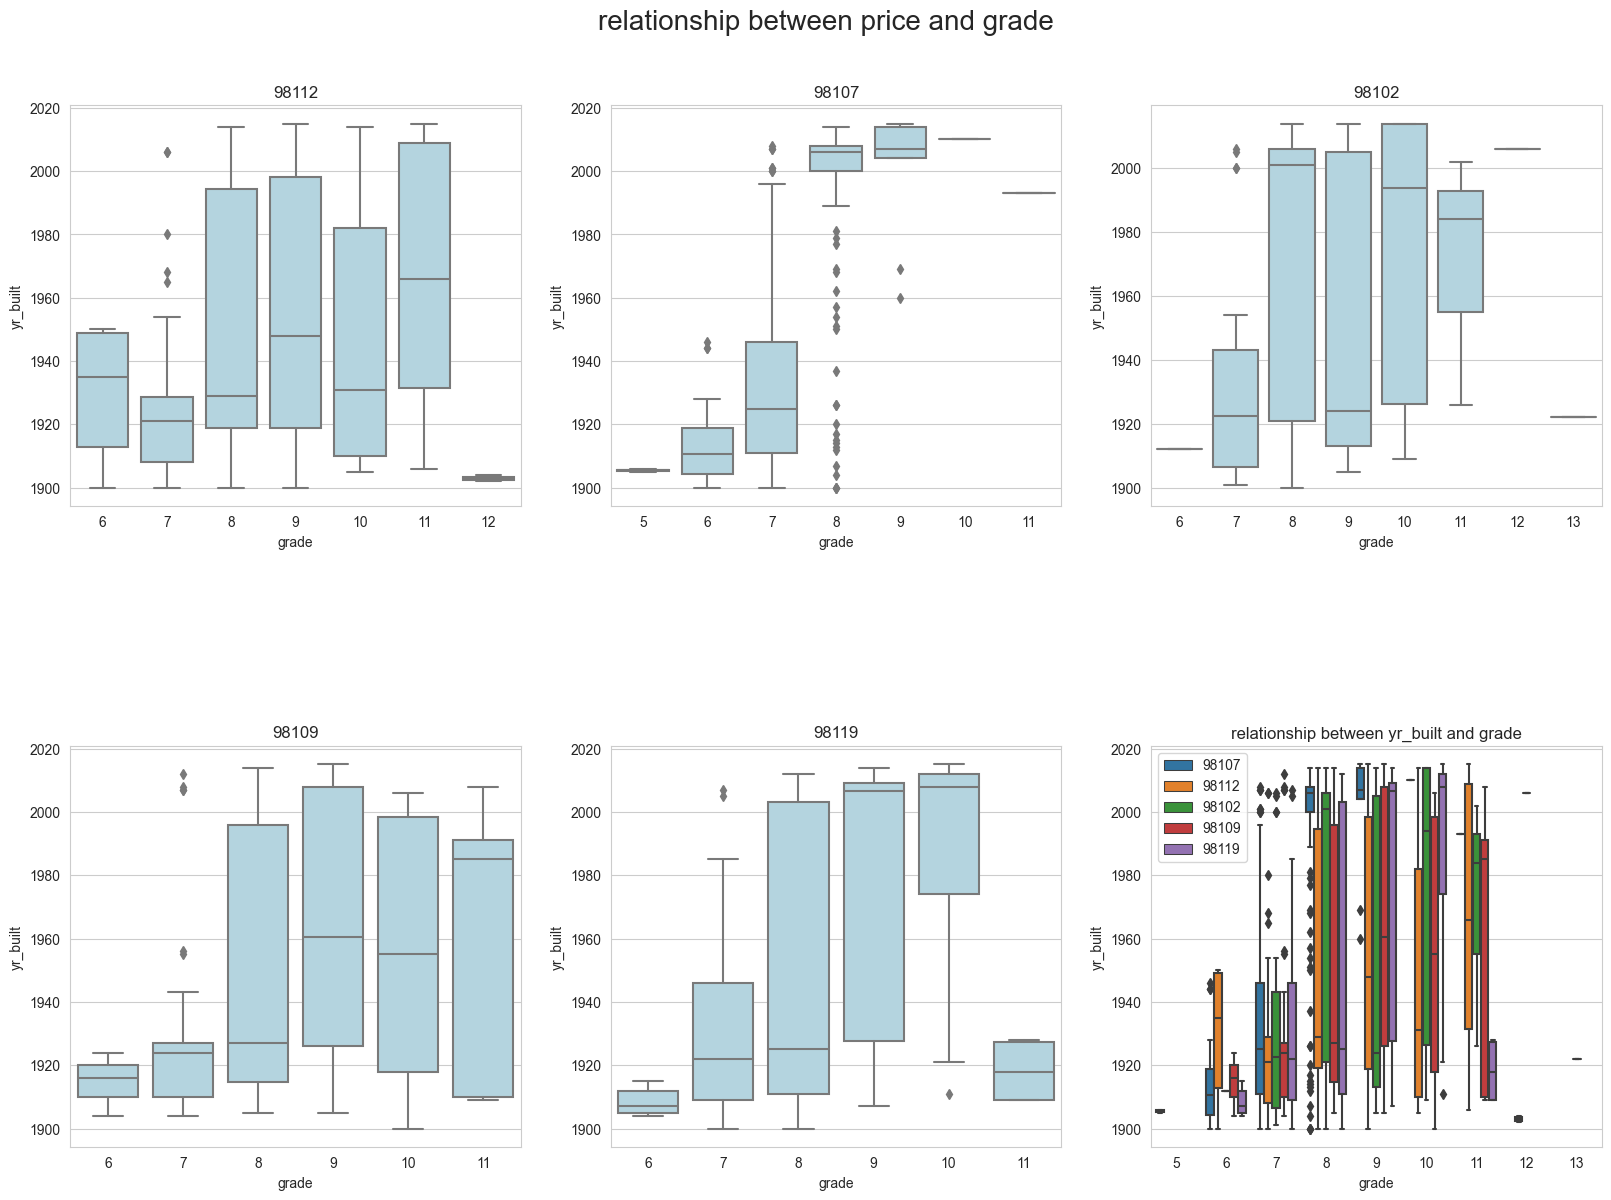

In [760]:
# relationship between yr_built and grade
fig, ax = plt.subplots(2,3, figsize=(16,12))
plt.suptitle('relationship between price and grade', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.boxplot(x=df_selected_112["grade"], y = df_selected_112['yr_built'], ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.boxplot(x=df_selected_107["grade"], y = df_selected_107['yr_built'], ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.boxplot(x=df_selected_102["grade"], y = df_selected_102['yr_built'], ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.boxplot(x=df_selected_109["grade"], y = df_selected_109['yr_built'], ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.boxplot(x=df_selected_119["grade"], y = df_selected_119['yr_built'], ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 = sns.boxplot(x='grade', y ='yr_built',data=df_selected_1,hue='zipcode', ax=ax[1,2]) # creates barchart for number of views
f6.set_title("relationship between yr_built and grade")
f6.legend()

In [761]:
df_a = df_selected_1[['condition', 'zipcode','grade','bedrooms','bathrooms']]
df_a

condition zipcode  grade  bedrooms  bathrooms
78             4   98107      6     1.000      0.750
236            5   98112      8     4.000      2.250
362            3   98112      9     4.000      3.750
363            5   98112     10     4.000      3.500
364            3   98112     11     4.000      4.000
...          ...     ...    ...       ...        ...
21321          3   98102      9     2.000      2.500
21322          3   98102      9     3.000      2.500
21323          3   98102     13     5.000      3.750
21324          5   98102      9     4.000      3.000
21419          5   98107      7     4.000      2.500

[928 rows x 5 columns]

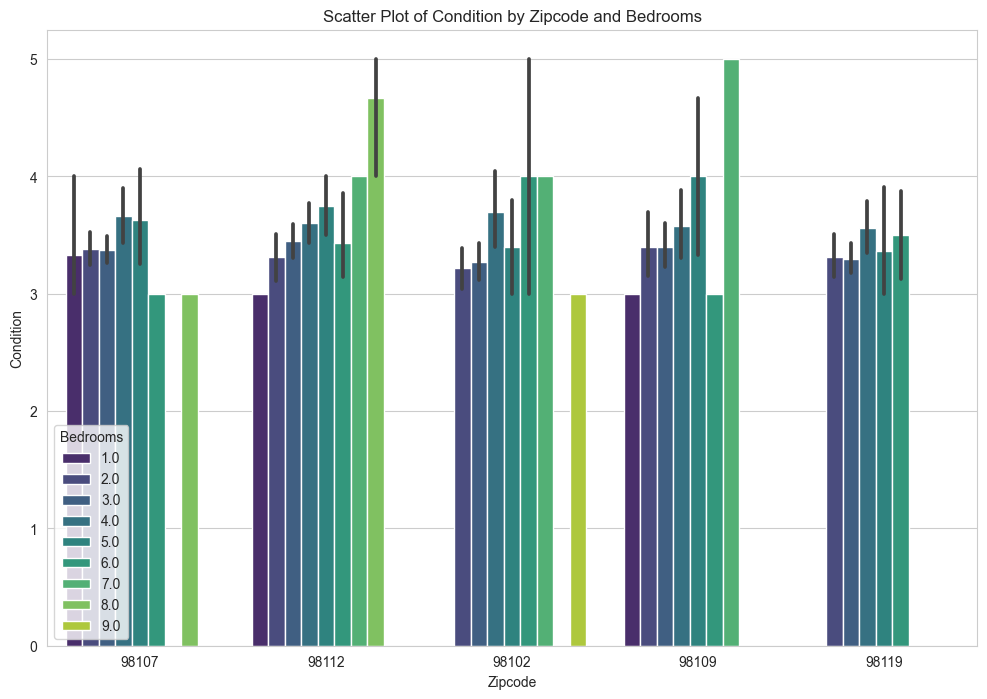

In [762]:


# barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_a, x='zipcode', y='condition', hue='bedrooms', palette='viridis')
plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
plt.xlabel('Zipcode')
plt.ylabel('Condition')
plt.legend(title='Bedrooms')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


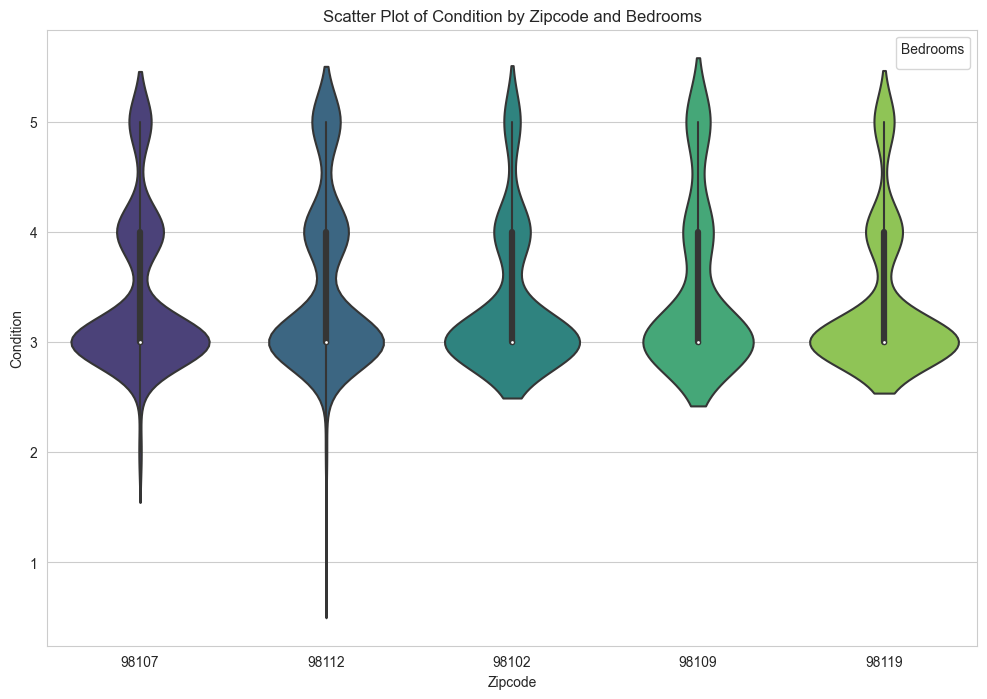

In [763]:

# 
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='zipcode', y='condition', palette='viridis')
plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
plt.xlabel('Zipcode')
plt.ylabel('Condition')
plt.legend(title='Bedrooms')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


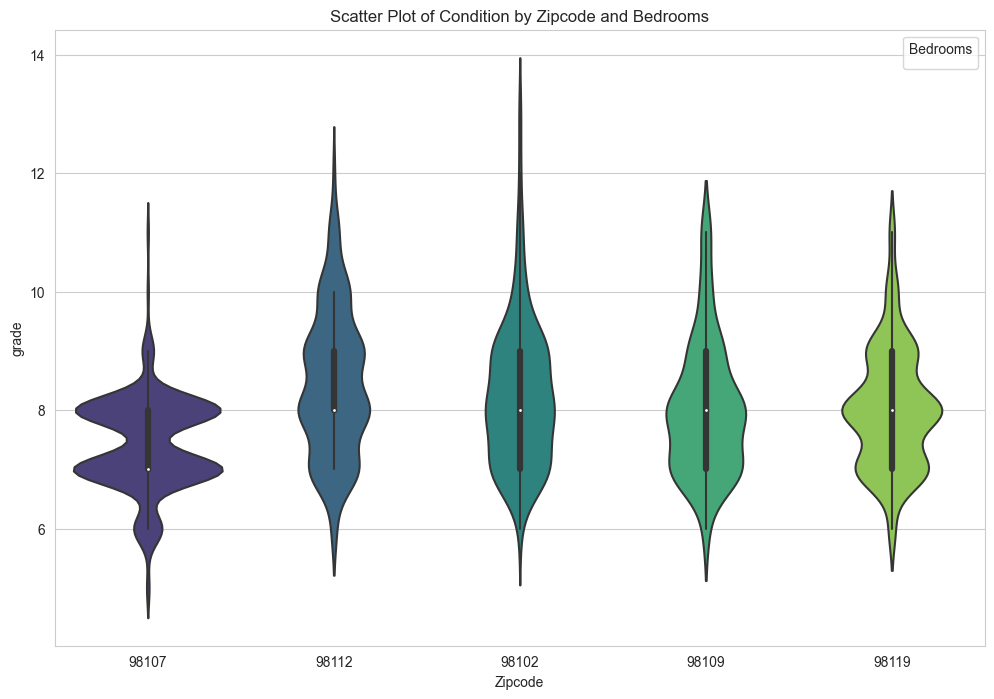

In [764]:
# 创建散点图
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='zipcode', y='grade', palette='viridis')
plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
plt.xlabel('Zipcode')
plt.ylabel('grade')
plt.legend(title='Bedrooms')
plt.show()

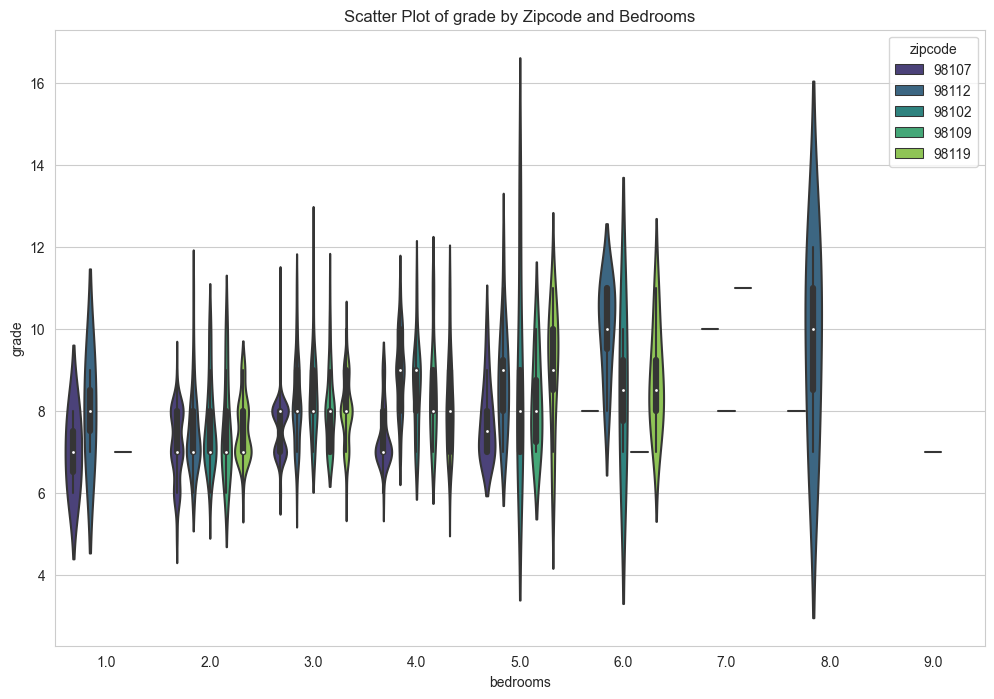

In [782]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='bedrooms', y='grade',hue='zipcode', palette='viridis')
plt.title('Scatter Plot of grade by Zipcode and Bedrooms')
##plt.xlabel('Zipcode')
#plt.ylabel('grade')
#plt.legend(title='Bedrooms')
plt.show()

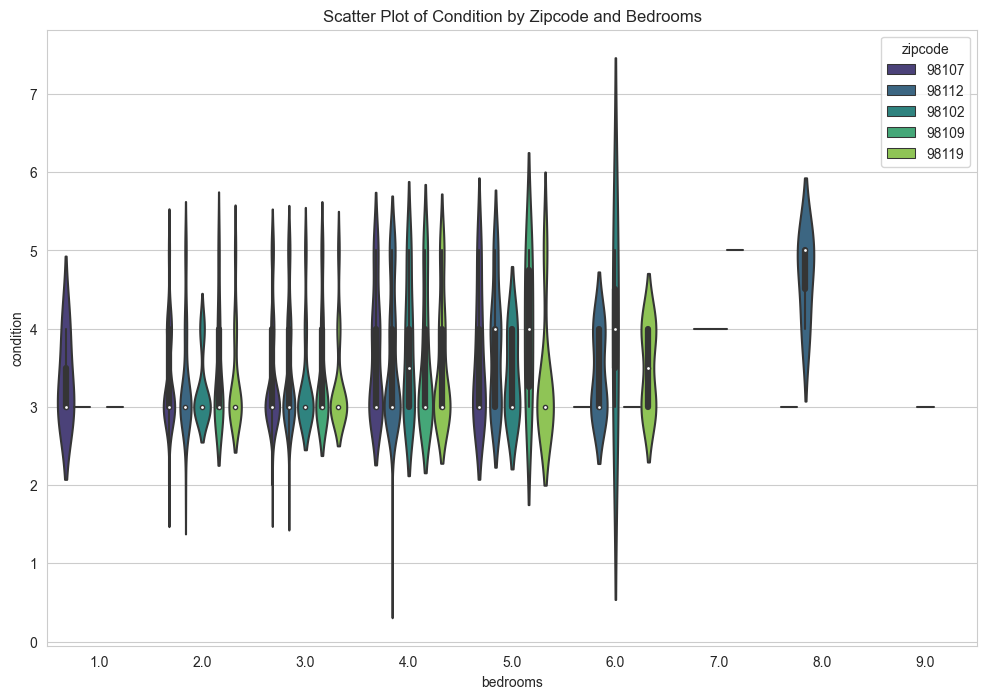

In [766]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='bedrooms', y='condition',hue='zipcode', palette='viridis')
plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
##plt.xlabel('Zipcode')
#plt.ylabel('grade')
#plt.legend(title='Bedrooms')
plt.show()

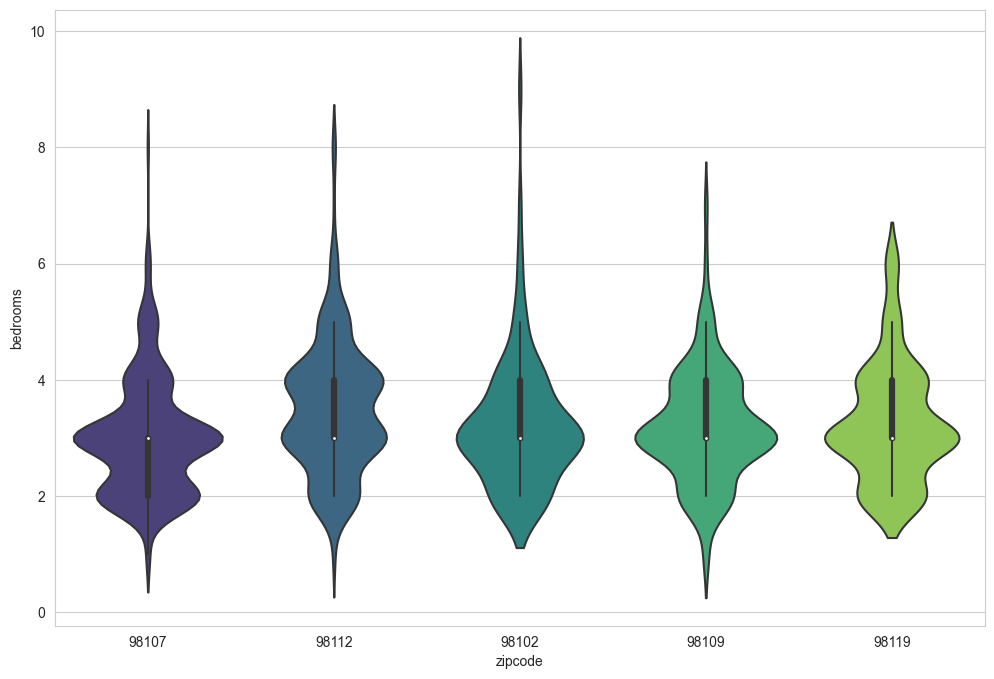

In [783]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='zipcode', y='bedrooms', palette='viridis')
#plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
##plt.xlabel('Zipcode')
#plt.ylabel('grade')
#plt.legend(title='Bedrooms')
plt.show()

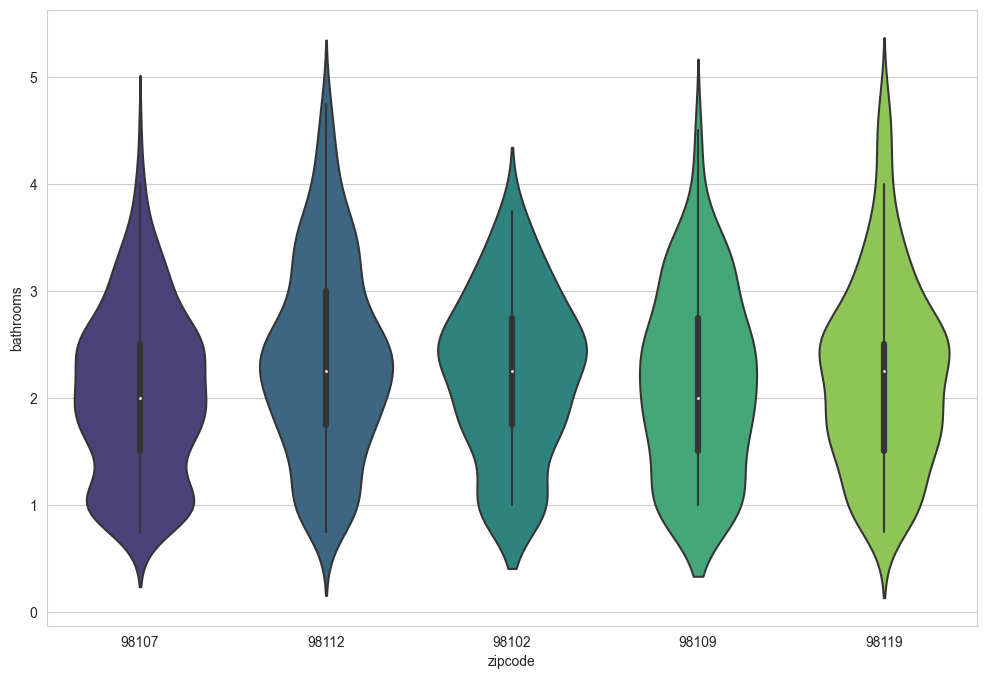

In [768]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_a, x='zipcode', y='bathrooms', palette='viridis')
#plt.title('Scatter Plot of Condition by Zipcode and Bedrooms')
##plt.xlabel('Zipcode')
#plt.ylabel('grade')
#plt.legend(title='Bedrooms')
plt.show()

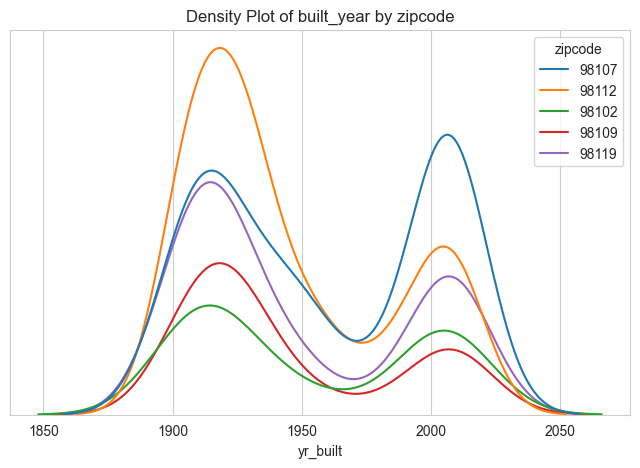

In [769]:
sns.kdeplot(data=df_selected, x="yr_built", hue='zipcode')

# 添加标题和标签
plt.title('Density Plot of built_year by zipcode')
plt.xlabel('yr_built')
plt.ylabel('Density')
plt.gca().axes.get_yaxis().set_visible(False)

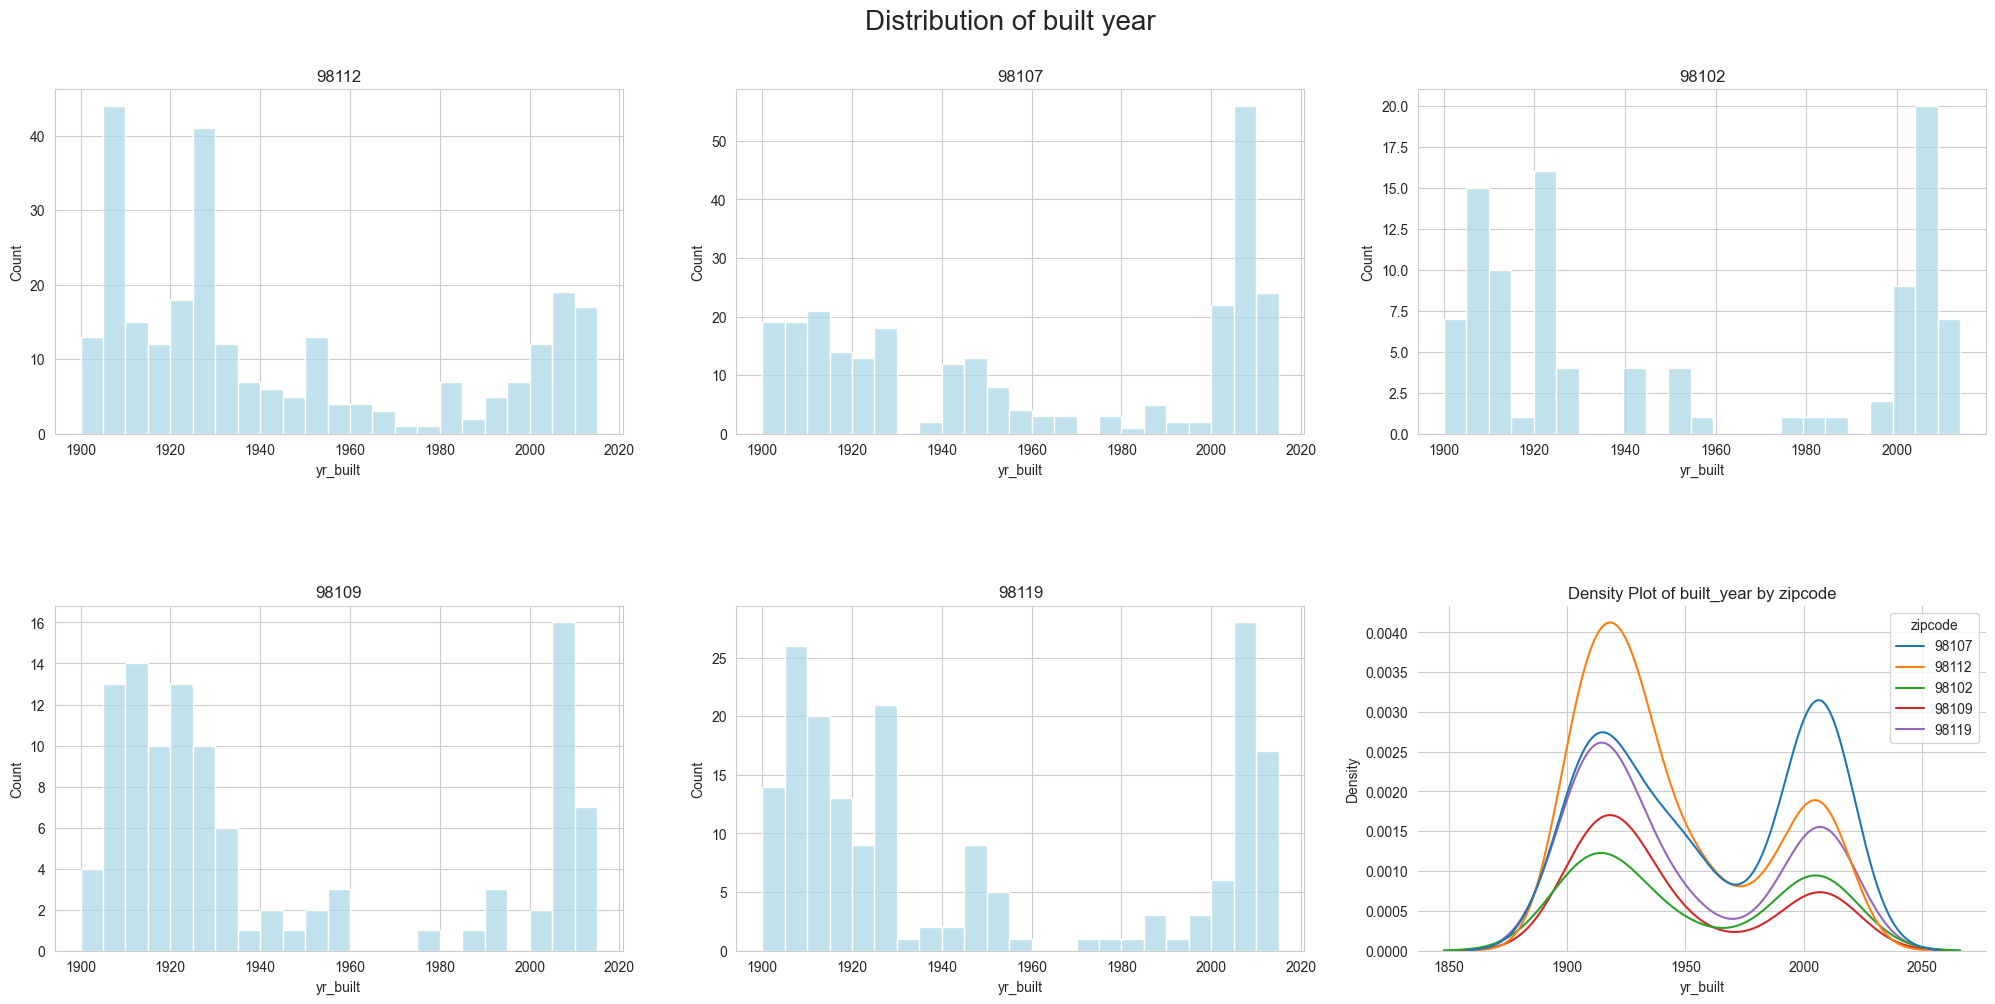

In [770]:

fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of built year', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.histplot(x=df_selected_112["yr_built"],bins=23, ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.histplot(x=df_selected_107["yr_built"], bins=23, ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.histplot(x=df_selected_102['yr_built'], bins=23, ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.histplot(x=df_selected_109["yr_built"], bins=23, ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.histplot(x=df_selected_119["yr_built"], bins=23, ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 =sns.kdeplot(data=df_selected, x="yr_built", hue='zipcode',ax=ax[1,2])
f6.set_title("Density Plot of built_year by zipcode")
sns.despine(left=True, ax=ax[1,2])

# 添加标题和标签
#plt.title('Density Plot of built_year by zipcode')
#plt.xlabel('yr_built')
#plt.ylabel('Density')
#plt.gca().axes.get_yaxis().set_visible(False)
#fig.delaxes(ax[1][2]);

In [771]:
df_selected['price'].quantile(0.4)

625000.0

In [772]:
df_selected['price'].quantile(0.6)

769990.0

In [773]:
df_selected['price'].describe()

count       929.000
mean     853183.746
std      535502.712
min      169317.000
25%      535000.000
50%      690000.000
75%      952500.000
max     7700000.000
Name: price, dtype: float64

In [774]:
df_selected_price = df_selected[(df_selected['price'] < 952500.000) & (df_selected['price'] >625000.0 )]
df_selected_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 578 to 21419
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   house_id                  317 non-null    int64         
 1   bedrooms                  317 non-null    float64       
 2   bathrooms                 317 non-null    float64       
 3   sqft_living               317 non-null    float64       
 4   sqft_lot                  317 non-null    float64       
 5   floors                    317 non-null    float64       
 6   waterfront                283 non-null    float64       
 7   view                      317 non-null    float64       
 8   condition                 317 non-null    int64         
 9   grade                     317 non-null    int64         
 10  sqft_above                317 non-null    float64       
 11  sqft_basement             309 non-null    float64       
 12  yr_built               

In [775]:
df_selected_11 = df_selected[(df_selected['bathrooms']>=1)&(df_selected['bathrooms']<4)&(df_selected['bedrooms']<=6)]
#df_selected_11.info()
unique_values = df_selected_11[['bedrooms', 'condition', 'grade']].drop_duplicates()
df_selected_11['condition'].describe()
df_selected_11['grade'].describe()
df_selected_11.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 236 to 21419
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   house_id                  887 non-null    int64         
 1   bedrooms                  887 non-null    float64       
 2   bathrooms                 887 non-null    float64       
 3   sqft_living               887 non-null    float64       
 4   sqft_lot                  887 non-null    float64       
 5   floors                    887 non-null    float64       
 6   waterfront                789 non-null    float64       
 7   view                      886 non-null    float64       
 8   condition                 887 non-null    int64         
 9   grade                     887 non-null    int64         
 10  sqft_above                887 non-null    float64       
 11  sqft_basement             860 non-null    float64       
 12  yr_built               

### Price over time

In [776]:
#group by dedrooms as 3 tpyes：S（1-2bedrooms），M（3-4Bedrooms），L（5-6）
bins = [0,2,4,6]
labels = ['S', 'M', 'L']
df_selected_11['size']=pd.cut(df_selected_11['bedrooms'],bins=bins,labels =labels)
df_selected_11.head()

house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
236  1084000107     4.000      2.250     2870.000  6000.000   1.000   
362  1118000080     4.000      3.750     3600.000 16101.000   1.000   
363  1118000110     4.000      3.500     4730.000 13586.000   1.500   
366  1118000340     5.000      3.750     4590.000 11265.000   2.000   
367  1118000465     3.000      3.500     3780.000  8295.000   2.000   

     waterfront  view  condition  grade  ...  sqft_lot15       date  \
236       0.000 0.000          5      8  ...    5500.000 2014-12-02   
362       0.000 0.000          3      9  ...    9506.000 2015-03-31   
363       0.000 0.000          5     10  ...    8828.000 2014-05-29   
366       0.000 0.000          4     11  ...    8996.000 2015-04-08   
367         NaN 0.000          3      9  ...    9127.000 2015-03-12   

          price     id  year     area  price/sqft  sqft_living15/sqft_lot15  \
236 1270000.000   3127  2014  Seattle     442.509                     0.431   
362 1930000.000  16111  2015  Seattle     536.111                     0.384   
363 2450000.000   3732  2014  Seattle     517.970                     0.420   
366 3000000.000  11964  2015  Seattle     653.595                     0.430   
367 1810000.000   2319  2015  Seattle     478.836                     0.414   

     sqft_living/sqft_lot size  
236                 0.478    M  
362                 0.224    M  
363                 0.348    M  
366                 0.407    L  
367                 0.456    M  

[5 rows x 28 columns]

In [777]:
#df_selected_c3 = df_selected_11[df_selected_11['condition']==3]
#df_selected_c3g789 = df_selected_c3[(df_selected_c3['grade'] == 7) | (df_selected_c3['grade'] == 8) | (df_selected_c3['grade'] == 9)]
##df_price_time_sml_c3_g789 = df_selected_c3[['price', 'date', 'bedrooms', 'condition', 'grade', 'size', 'price/sqft','zipcode']]
#df_price_time_sml_c3_g789['year_month']=df_price_time_sml_c3_g789['date'].dt.to_period('M')


#df_price_time = df_price_time_sml_c3_g789.groupby(['size', 'condition', 'grade', 'year_month']).agg({'price/sqft': 'mean'})

#df_price_time

In [778]:
df_price_time = df_selected_11[['house_id','date','price','size','price/sqft','zipcode']]
df_price_time['year_month'] = df_price_time['date'].dt.to_period('M')
df_price_time['year_month'] = df_price_time['date'].dt.to_period('M')

#df_price_time = df_price_time.replace(np.nan,0)
df_p_t_s = df_price_time[df_price_time[('size')] == "S"]
df_p_t_m = df_price_time[df_price_time[('size')] == "M"]
df_p_t_l = df_price_time[df_price_time[('size')] == "L"]
df_p_t_s_count = df_p_t_s.groupby(['size', 'zipcode', 'year_month'])['house_id'].count().reset_index()
df_p_t_m_count = df_p_t_m.groupby(['size', 'zipcode', 'year_month'])['house_id'].count().reset_index()
df_p_t_l_count = df_p_t_m.groupby(['size', 'zipcode', 'year_month'])['house_id'].count().reset_index()
df_p_t_s_count = df_p_t_s_count[df_p_t_s_count['house_id'] != 0]
df_p_t_m_count = df_p_t_m_count[df_p_t_m_count['house_id'] != 0]
df_p_t_l_count = df_p_t_l_count[df_p_t_l_count['house_id'] != 0]
#df_p_t_l_count.head(100)
#df_p_t_s_count['year_month'] = pd.to_datetime(df_p_t_s_count['year_month'].astype(str))
#df_p_t_m_count['year_month'] = pd.to_datetime(df_p_t_m_count['year_month'].astype(str))
#df_p_t_l_count['year_month'] = pd.to_datetime(df_p_t_l_count['year_month'].astype(str))

df_p_t_s_mean = df_p_t_s.groupby(['size', 'zipcode', 'year_month'])['price'].mean().reset_index()
df_p_t_m_mean = df_p_t_m.groupby(['size', 'zipcode', 'year_month'])['price'].mean().reset_index()
df_p_t_l_mean = df_p_t_l.groupby(['size', 'zipcode', 'year_month'])['price'].mean().reset_index()
df_p_t_s_mean.head()
df_p_t_s_mean.dropna(inplace=True)
df_p_t_m_mean.dropna(inplace=True)
df_p_t_l_mean.dropna(inplace=True)
df_p_t_s.head()


df_p_t_s_mean['year_month'] = pd.to_datetime(df_p_t_s_mean['year_month'].astype(str))
df_p_t_m_mean['year_month'] = pd.to_datetime(df_p_t_m_mean['year_month'].astype(str))
df_p_t_l_mean['year_month'] = pd.to_datetime(df_p_t_l_mean['year_month'].astype(str))




df_psqft_t_s_median = df_p_t_s.groupby(['size', 'zipcode', 'year_month'])['price/sqft'].median().reset_index()
df_psqft_t_m_median = df_p_t_m.groupby(['size', 'zipcode', 'year_month'])['price/sqft'].median().reset_index()
df_psqft_t_l_median = df_p_t_l.groupby(['size', 'zipcode', 'year_month'])['price/sqft'].median().reset_index()
df_psqft_t_s_median.dropna(inplace=True)
df_psqft_t_m_median.dropna(inplace=True)
df_psqft_t_l_median.dropna(inplace=True)
df_psqft_t_s_median.head()
df_psqft_t_s_median['year_month'] = pd.to_datetime(df_p_t_s_mean['year_month'].astype(str))
df_psqft_t_m_median['year_month'] = pd.to_datetime(df_p_t_m_mean['year_month'].astype(str))
df_psqft_t_l_median['year_month'] = pd.to_datetime(df_p_t_l_mean['year_month'].astype(str))
df_p_t_s_mean.head()


size zipcode year_month      price
0    S   98102 2014-05-01 402000.000
1    S   98102 2014-06-01 425950.000
2    S   98102 2014-07-01 493500.000
3    S   98102 2014-08-01 407500.000
4    S   98102 2014-09-01 455000.000

<Axes: xlabel='year_month', ylabel='price'>

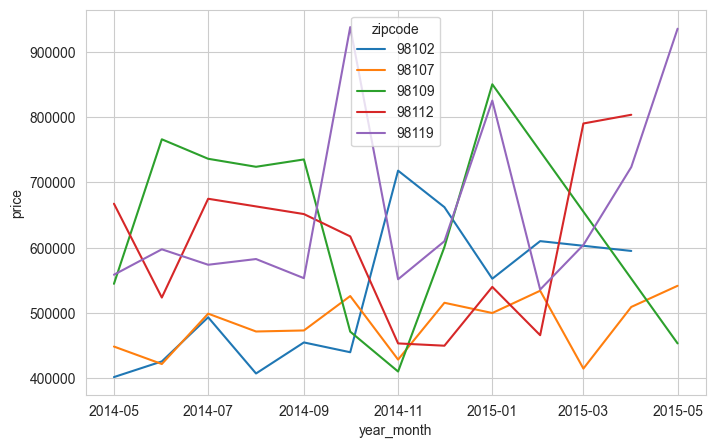

In [779]:
plt.figure()
sns.set_style('whitegrid')


sns.lineplot(y='price', x='year_month', data=df_p_t_s_mean, hue='zipcode')

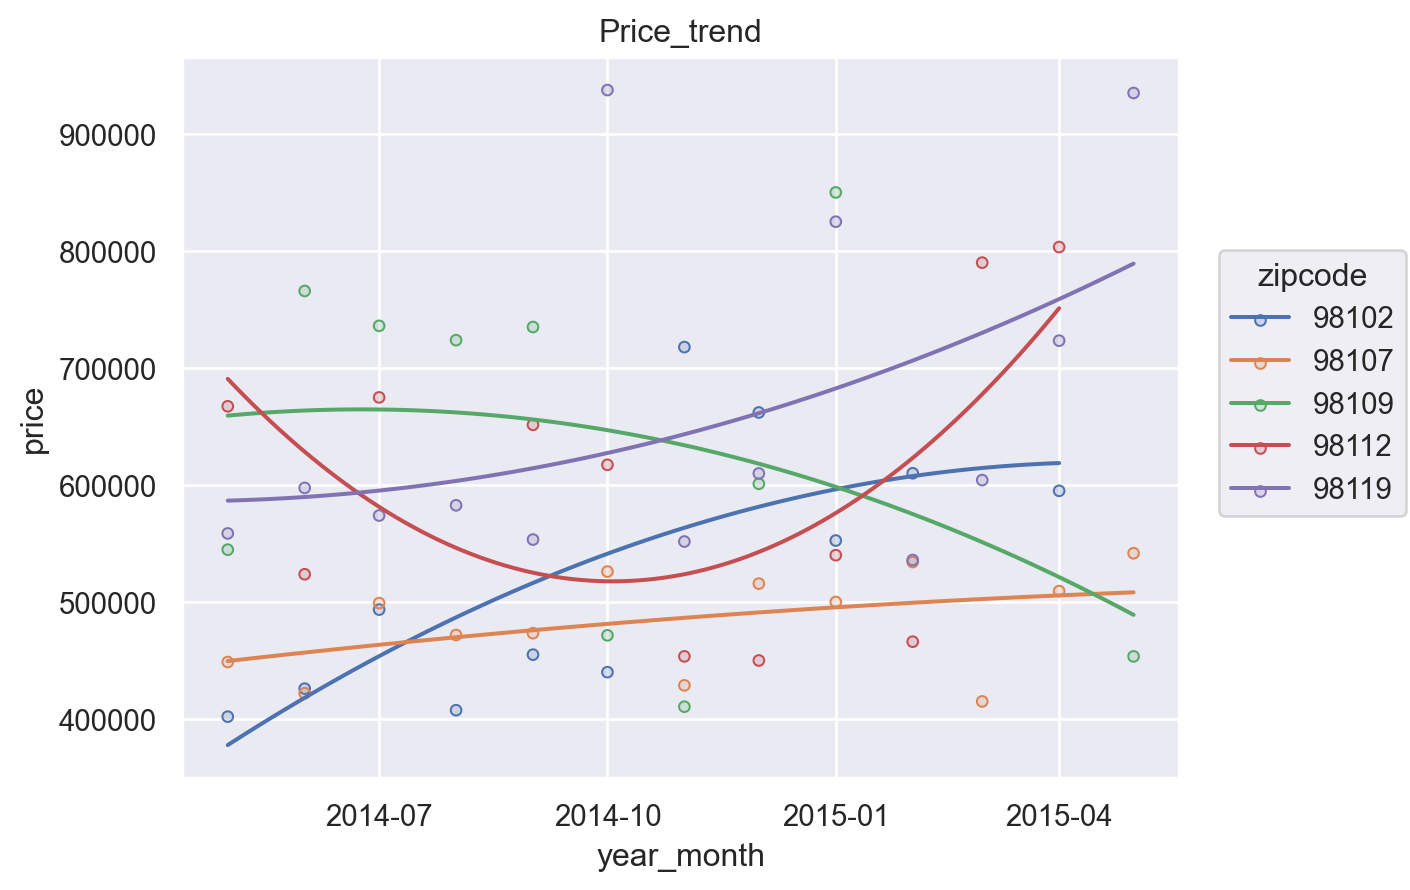

In [780]:
ps=(
    so.Plot(df_p_t_s_mean, y="price", x="year_month", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
ps.label(title="Price_trend")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


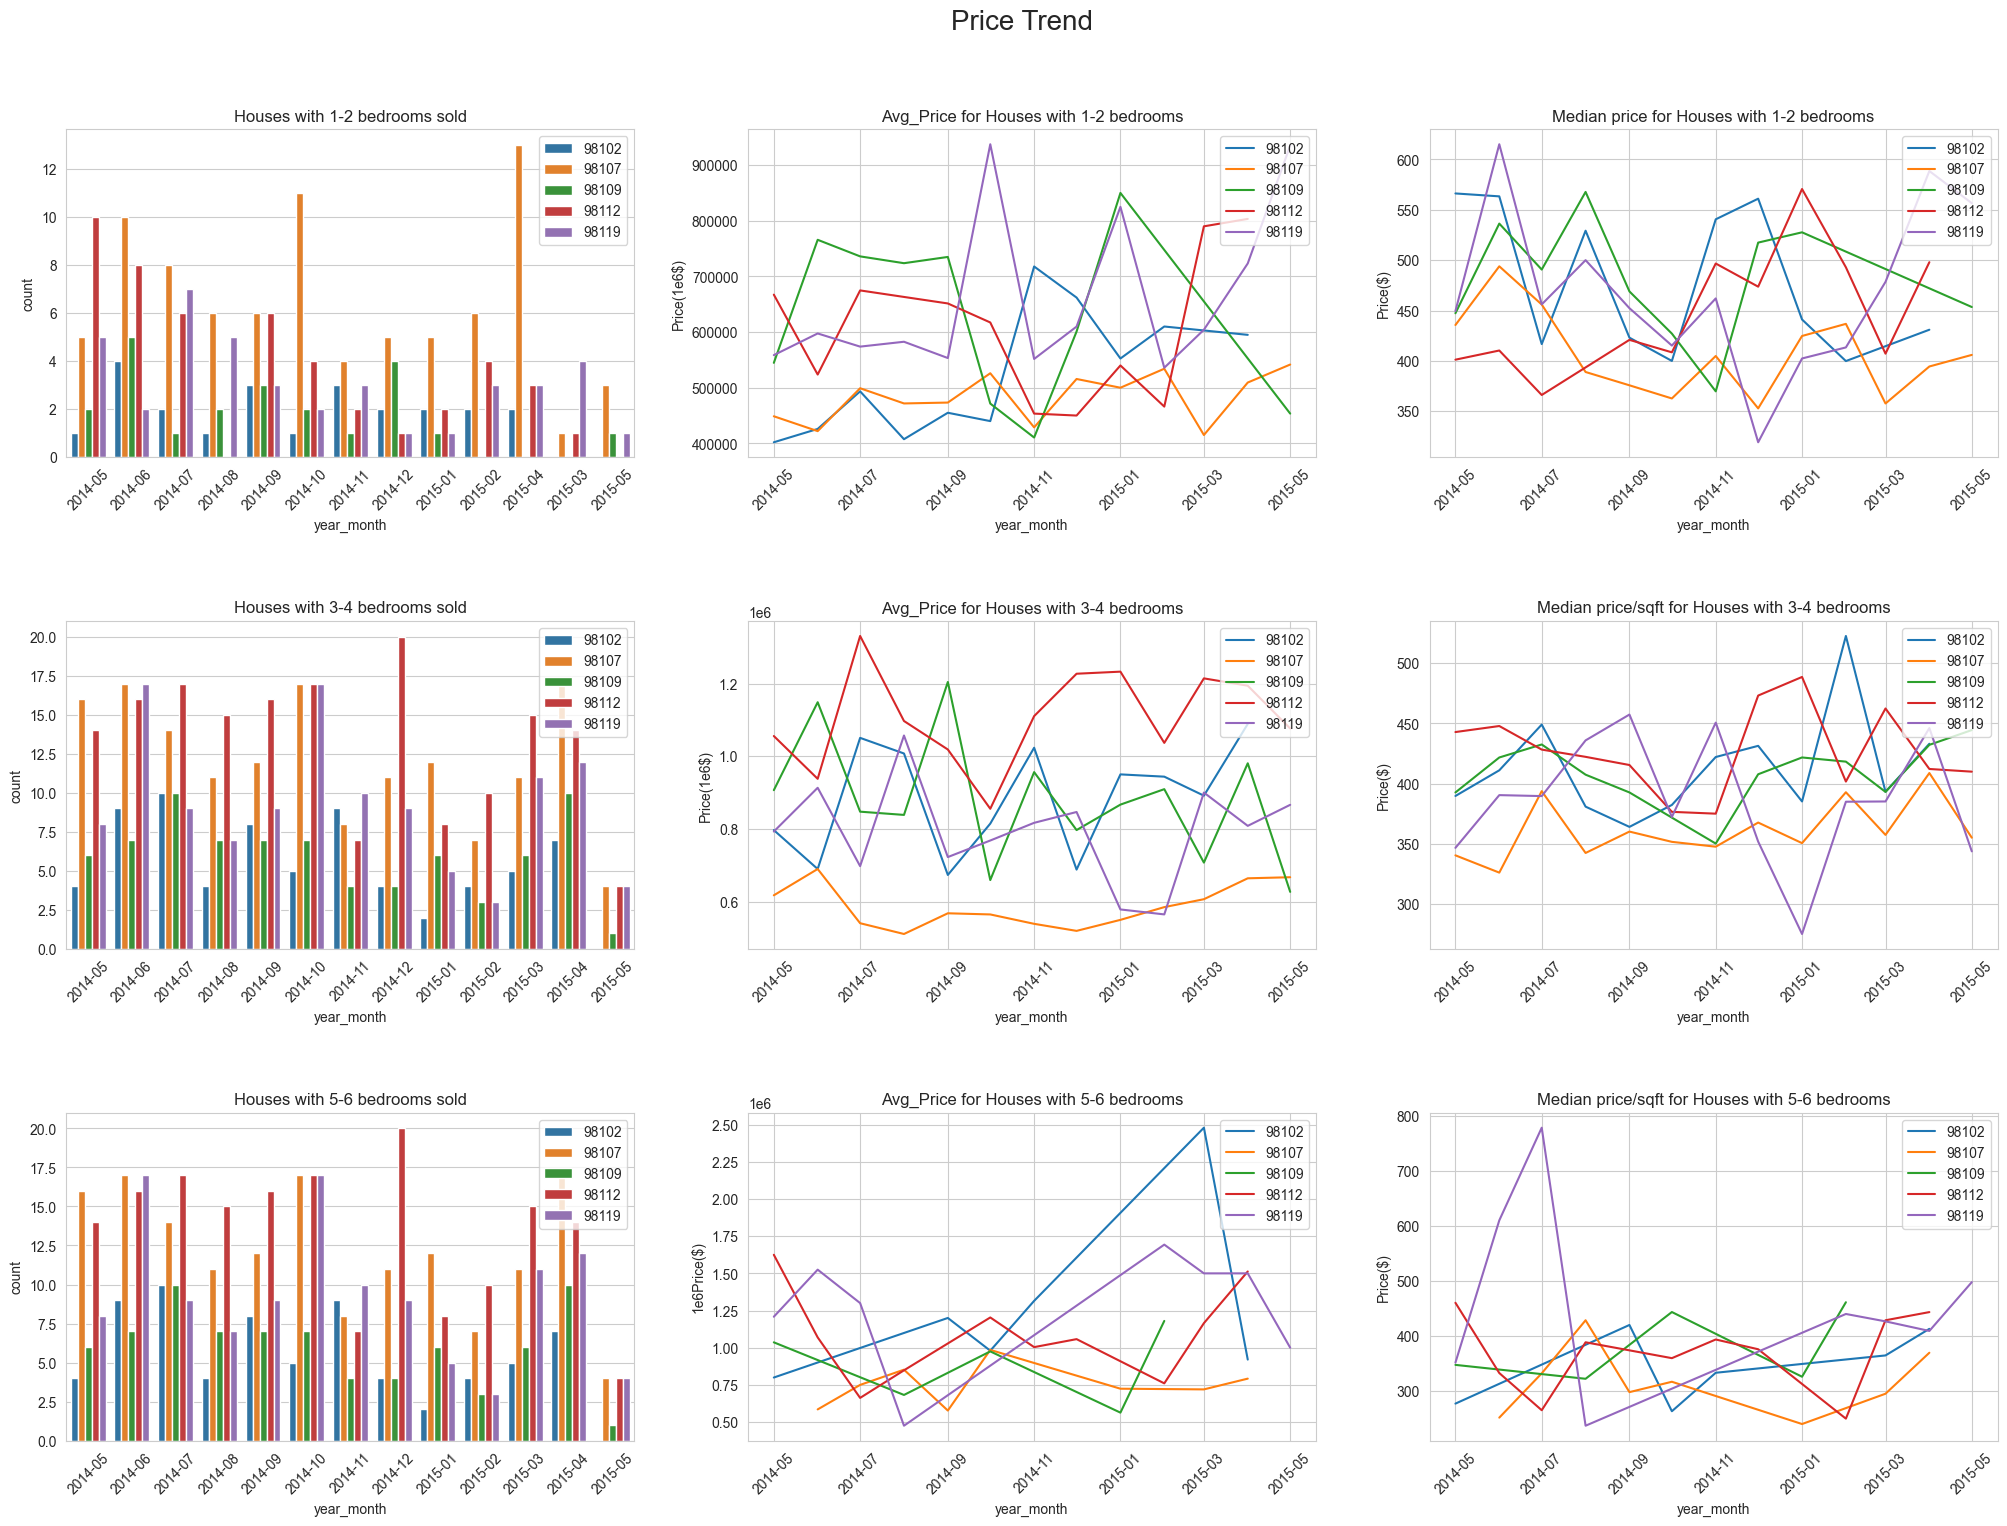

In [785]:
fig, ax = plt.subplots(3,3, figsize=(20,15)) # create subplots on 2 rows and 3 columns
plt.suptitle('Price Trend', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

f1 = sns.barplot(data=df_p_t_s_count,y='house_id',x='year_month',hue='zipcode',ax=ax[0,0]) 
f1.set_title("Houses with 1-2 bedrooms sold")
f1.set_ylabel("count")
f1.set_xticklabels(f1.get_xticklabels(),rotation = 45)
f1.legend(loc='upper right')
f2 = sns.lineplot(y='price', x='year_month', data=df_p_t_s_mean, hue='zipcode',ax=ax[0,1])
f2.set_title("Avg_Price for Houses with 1-2 bedrooms")
f2.set_ylabel("Price(1e6$)")
f2.set_xticklabels(f2.get_xticklabels(),rotation = 45)
f2.legend(loc='upper right')

f3 = sns.lineplot(y='price/sqft', x='year_month', data=df_psqft_t_s_median, hue='zipcode',ax=ax[0,2])
f3.set_title("Median price for Houses with 1-2 bedrooms")
f3.set_ylabel("Price($)")
f3.set_xticklabels(f3.get_xticklabels(),rotation = 45)
f3.legend(loc='upper right')

f4 = sns.barplot(data=df_p_t_m_count,y='house_id',x='year_month',hue='zipcode',ax=ax[1,0]) 
f4.set_title("Houses with 3-4 bedrooms sold")
f4.set_ylabel("count")
f4.set_xticklabels(f4.get_xticklabels(),rotation = 45)
f4.legend(loc='upper right')

f5 = sns.lineplot(y='price', x='year_month', data=df_p_t_m_mean, hue='zipcode',ax=ax[1,1])
f5.set_title("Avg_Price for Houses with 3-4 bedrooms")
f5.set_ylabel("Price(1e6$)")
f5.set_xticklabels(f5.get_xticklabels(),rotation = 45)
f5.legend(loc='upper right')

f6 = sns.lineplot(y='price/sqft', x='year_month', data=df_psqft_t_m_median, hue='zipcode',ax=ax[1,2])
f6.set_title("Median price/sqft for Houses with 3-4 bedrooms")
f6.set_ylabel("Price($)")
f6.set_xticklabels(f6.get_xticklabels(),rotation = 45)
f6.legend(loc='upper right')

f7 = sns.barplot(data=df_p_t_l_count,y='house_id',x='year_month',hue='zipcode',ax=ax[2,0]) 
f7.set_title("Houses with 5-6 bedrooms sold")
f7.set_ylabel("count")
f7.set_xticklabels(f7.get_xticklabels(),rotation = 45)
f7.legend(loc='upper right')

f8 = sns.lineplot(y='price', x='year_month', data=df_p_t_l_mean, hue='zipcode',ax=ax[2,1])
f8.set_title("Avg_Price for Houses with 5-6 bedrooms")
f8.set_ylabel("1e6Price($)")
f8.set_xticklabels(f8.get_xticklabels(),rotation = 45)
f8.legend(loc='upper right')

f9 = sns.lineplot(y='price/sqft', x='year_month', data=df_psqft_t_l_median, hue='zipcode',ax=ax[2,2])
f9.set_title("Median price/sqft for Houses with 5-6 bedrooms")
f9.set_ylabel("Price($)")
f9.set_xticklabels(f9.get_xticklabels(),rotation = 45)
f9.legend(loc='upper right')